In [1]:
#
# IMPORTANT:
#
# As github preview does not support plots generated by plotly, current render mode is set to "github",
# which embeds previously generated plots in the relevant sections of this notebook for github preview.
# In order to access interactive plots, please download files from this repository and, after opening
# this notebook, change render_mode (last line in this cell) to "interactive". Afterwards please choose
# "Restart Kernel and Run All Cells" from the jupyter environment menu.
#
# Happy reading!
#

render_mode = "github"

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
from helpers.m2s3_helpers import *
from IPython.display import Markdown, display
from plotly.subplots import make_subplots
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.miscmodels.ordinal_model import OrderedModel
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VINHO VERDE TINTO, PORTUGAL - EXPLANATORY MODEL
by Andrius Drazdys | adrazd, 2024-06 DS, Turing College, Vilnius

## Introduction
Portugal. Most people picture the Algarve when imagining this beautiful country. Along the Mediterranean, the Algarve is hot and dry with sandy beaches and idyllic blue waters. Up North, it’s a very different story. The Minho faces the Atlantic to the west, in all its fury of rainy, coastal weather. This is where *Vinho Verde* is from. *Vinho Verde* refers to Portuguese wine that originated in the historic Minho province. *Vinho Verde* is not a grape variety, it is a DOC (*denominação de origem controlada* - the system of protected designation of agricultural products from Portugal) for the production of wine. The name means "green wine", but translates as "young wine", with wine being released three to six months after the grapes are harvested. They may be red (tinto), white (branco), or rosé, and they are usually consumed soon after bottling.

![Minho region in Portugal](images/minhas_region_vinho_verde.png)

*Vinho Verde’s* unique viticulture is largely influenced by its setting along the main rivers that flow through the lush Minho province. The vineyards are notably enriched by granite-rich soils, which contribute significantly to the high acidity typical of the wines from this region.

Less well-known than white *Vinho Verde* (*Vinho Verde branco*) outside of Portugal, red *Vinho Verde* (*Vinho Verde tinto*) offers a contrast to its lighter counterparts, featuring a fuller body and noticeable tannic structure. These wines are traditionally made from indigenous grape varieties such as:

- **Vinhão**: The most prominent red grape in the region, Vinhão produces deeply colored, almost opaque wines with robust tannins and pronounced acidity, often with berry and resinous notes.
- **Espadeiro**: Known for its fruity character and softer tannins compared to Vinhão, Espadeiro contributes to lighter, fresher reds.
- **Borraçal** and **Amaral**: These varieties add complexity and color, enhancing the blend with unique flavor profiles and structural depth.

Red Vinho Verde is typically enjoyed young and it has a certain rustic appeal, even more so when in traditional settings, such as *tascas* (Portuguese taverns) in the Minho region, it is served in ceramic mugs instead of actual glasses.

This project delves into the key factors impacting the quality of *Vinho Verde tinto*, focusing on an analytical overview and summarizing these in an explanatory model. The study aims to explore how different attributes — such as acidity levels, sugar content, and possibly other chemical and sensory characteristics — correlate with quality ratings, thus providing insights into how these elements shape the distinct profile of red Vinho Verde wine.

## Sources of Domain Knowledge
To gain a comprehensive understanding of the data and its domain, the following sources were consulted during the project:
- [Vinho Verde: an In-Depth Wine Profile](https://www.vinerra.com/education/wines/vinho-verde-an-in-depth-wine-profile)
- [Vinho Verde: a guide to Portugal’s most misunderstood wine](https://www.tasteoflisboa.com/blog/vinho-verde-a-guide-to-portugals-most-misunderstood-wine/)
- [Beginner’s Guide To Vinho Verde Wine](https://winefolly.com/deep-dive/vinho-verde-the-perfect-poolside-wine-from-portugal/)
- [A Fresher Wine: All you need to know about Vinho Verde](https://asipi.org/wp-content/uploads/2017/11/Presentacio%CC%81n-Joa%CC%83o-M.-Pimenta.pdf)
- [Vinho Verde at wikipedia](https://en.wikipedia.org/wiki/Vinho_Verde)
- [International Organisation of Vine and Wine](https://www.oiv.int/)
- [UC Irvine, Machine Learning Repository - primary source of the dataset](https://archive.ics.uci.edu/dataset/186/wine+quality)
- [Modeling wine preferences by data mining from physicochemical properties](https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377)

## Goals of the Project
- Analyze the dataset, which includes data about different attributes of *Vinho Verde tinto* wines.
- Formulate a hypothesis regarding impact on the quality of wine.
- To test the hypothesis, conduct a thorough Exploratory Data Analysis (EDA).
- Construct of a regression model. This model should investigate the relationships between the identified chemical attributes.
- Explain the components of the model.
- Fit the model to the "hold-out" set.

## Conclusions
Although the target variable `quality` might seem inherently subjective due to its sensory nature, the model, constructed using independent variables derived from physicochemical measurements, performs relatively well. There is, however, room for improvement in the performance for extreme quality classes, which are underrepresented, leading to dataset imbalance.

Outliers are relatively prevalent, with 340 of 1,359 rows (25%) containing at least one outlier. This prevalence is partially explained by the fact that some outliers fall within industry-acceptable boundaries. 

## Suggestions
Despite some outliers falling within industry-acceptable boundaries, further investigation remains highly relevant. However, the limited sample size and class imbalance could introduce potential bias into the results. A more extensive and balanced dataset would support a thorough analysis and significantly improve the stability and performance of the model in predicting wine quality.

## 1. Preprocessing
The primary goal of preprocessing is to inspect and, if necessary, clean the dataset to prepare it for Exploratory Data Analysis (EDA). This step is essential for identifying inconsistencies, handling missing values, and ensuring data integrity. By refining the data at this stage, clearer insights can be gained during EDA, enhancing understanding of the dataset in combination with domain expertise.

In [3]:
wine_quality = pd.read_csv("data/winequality-red.csv")
df = wine_quality.copy()

### 1.1 Inspection

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The dataset comprises 1,599 lines of data across 12 features. The feature `quality` is the sole integer feature and serves as the **target variable** for this project. The remaining 11 features are float features, representing various physicochemical factors that may influence the `quality` of the wine. These features are classified as **predictors** or **independent variables**. According to the description of the dataset at it's [primary source](https://archive.ics.uci.edu/dataset/186/wine+quality), `quality` is based on sensory data, while the other 11 features are based on physicochemical measurements. Nature of these variables is further explained in an article ["Modeling wine preferences by data mining from physicochemical properties"](https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377) by P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis:

> Physicochemical laboratory tests routinely used to characterize wine include determination of density, alcohol or pH values, while sensory tests rely mainly on human experts.

This indicates that the 11 features in the dataset are based on precise laboratory measurements, while the `quality` variable may be influenced by subjective assessments, potentially introducing bias into the data.

There are no missing values in the dataset.

### 1.2 Cleaning

In [7]:
df.duplicated().sum()

np.int64(240)

In [8]:
df = df.drop_duplicates().reset_index(drop=True)

Inspection of duplicate lines reveals a total of 240 duplicates. To maintain the consistency and integrity of the data, these duplicates are removed from the dataset.

At this stage, no inspection or actions concerning outliers will be conducted. Outliers and any potential anomalies will be investigated during the Exploratory Data Analysis (EDA) phase.

## 2. Main Hypothesis for Investigation
Sweetness (or its absence) is a characteristic easily perceived in wine, and wines that are 'too sweet' or 'too sour' are sometimes considered lower in quality. Based on this, the following hypothesis and corresponding null hypothesis are formulated for this investigation:

$H_1 : \text{residual  sugar  has  impact  on  the  quality  of  wine}$<br>
$H_0 : \text{residual  sugar  does  not  have  impact  on the  quality  of  wine}$<br>



## 3. Exploratory Data Analysis (EDA)
This Exploratory Data Analysis (EDA) phase will involve a thorough examination of each feature within the dataset. The process will incorporate insights derived from domain knowledge, detailed assessments of data distributions, and an investigation into potential outliers and anomalies. Additionally, correlations among features will be systematically examined to better understand their interrelationships. This analysis will be statistically rigorous, with findings supported by relevant domain expertise to provide a comprehensive understanding of the data's structure and characteristics.

### 3.1 Quality - Target Variable
The `quality` of wine is evaluated through several key sensory dimensions, including appearance, aroma, taste, mouthfeel, and finish. Each aspect contributes to the overall perception of `quality`.

- **Appearance:** The visual assessment includes clarity, color, and viscosity. High-quality wines are clear and vibrant in color, reflecting the grape variety and winemaking techniques. Viscosity can indicate richness and alcohol content, with thicker wines often suggesting higher quality.
- **Aroma:** Aromas play a crucial role in determining quality, encompassing primary (grape-derived), secondary (fermentation), and tertiary (aging) scents. A complex and balanced aroma profile, featuring fruity, floral, and earthy notes, typically indicates a higher-quality wine.
- **Taste:** The taste profile is assessed through sweetness, acidity, tannins, and overall balance. A well-structured wine harmonizes these elements, creating an enjoyable tasting experience.
- **Mouthfeel:** This refers to the tactile sensations in the mouth, including body and texture. A smooth, full-bodied mouthfeel enhances the perception of quality.
- **Finish:** The aftertaste is also important; a long, pleasant finish suggests a well-crafted wine, while a short or unpleasant finish may indicate lower quality.

Overall, wine `quality` is determined by the interplay of these sensory attributes, providing a comprehensive framework for evaluation.

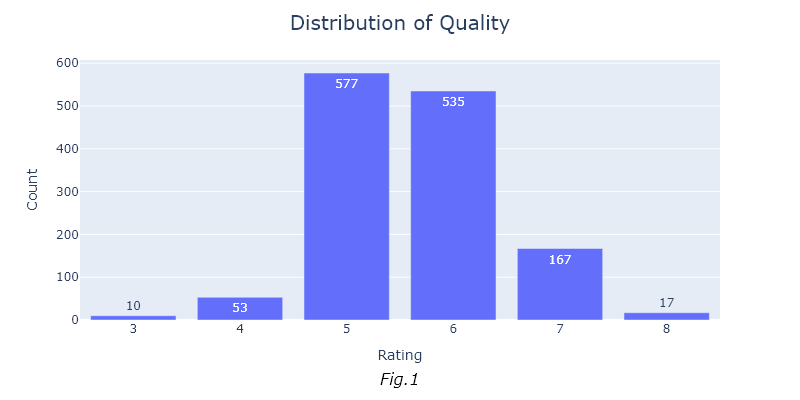

In [9]:
quality_counts = df["quality"].value_counts().reset_index()
quality_counts.columns = ["quality", "count"]

fig1 = px.bar(quality_counts, x="quality", y="count", text="count")

fig_update(
    fig1, "Distribution of Quality", "<i>Fig.1</i>", "Rating", "Count", "", 800, 400
)

fig_px_render(fig1, render_mode, "Fig1")

Referring to the [primary source](https://archive.ics.uci.edu/dataset/186/wine+quality) of the dataset, the `quality` feature generally has a score ranging from 0 to 10. As illustrated in *Fig. 1*, the dataset includes scores from 3 to 8. Average quality wines comprise the biggest part of the dataset with 577 wines with `quality` rating of 5 and 535 wines with `quality` rating of 6. The worst (`quality` rating of 3) and the best (`quality` rating of 8) wines have 10 and 17 counts respectively. Overall, it seems that classes 3, 4 and 8 are severely underrepresented in the data. This could impact performance of the model, which will be constructed and tested in the subsequent chapters of this notebook.

To ensure accurate correlation measurements aligned with the data types in this project, *Spearman* correlations will be used by default throughout, as the **target variable** is ordinal and discrete, while the **independent variables** are continuous. Any deviations from this method will be explicitly noted.

In [10]:
corr_matrix = df.corr(method="spearman")

corr_bar(corr_matrix, "quality")

<style type="text/css">
#T_e5d19 th {
  white-space: normal;
  width: 50px;
}
#T_e5d19 td {
  width: 50px;
}
#T_e5d19_row0_col0 {
  background-color: #b40426;
  color: #f1f1f1;
}
#T_e5d19_row0_col1 {
  background-color: #dd5f4b;
  color: #f1f1f1;
}
#T_e5d19_row0_col2 {
  background-color: #f7af91;
  color: #000000;
}
#T_e5d19_row0_col3 {
  background-color: #edd2c3;
  color: #000000;
}
#T_e5d19_row0_col4 {
  background-color: #d5dbe5;
  color: #000000;
}
#T_e5d19_row0_col5 {
  background-color: #bed2f6;
  color: #000000;
}
#T_e5d19_row0_col6 {
  background-color: #b9d0f9;
  color: #000000;
}
#T_e5d19_row0_col7 {
  background-color: #86a9fc;
  color: #f1f1f1;
}
#T_e5d19_row0_col8 {
  background-color: #81a4fb;
  color: #f1f1f1;
}
#T_e5d19_row0_col9 {
  background-color: #7ea1fa;
  color: #f1f1f1;
}
#T_e5d19_row0_col10 {
  background-color: #3b4cc0;
  color: #f1f1f1;
}
</style>
<table id="T_e5d19" style="width: 55%;">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_e5d19_level0_col0" class="col_heading level0 col0" >alcohol</th>
      <th id="T_e5d19_level0_col1" class="col_heading level0 col1" >sulphates</th>
      <th id="T_e5d19_level0_col2" class="col_heading level0 col2" >citric acid</th>
      <th id="T_e5d19_level0_col3" class="col_heading level0 col3" >fixed acidity</th>
      <th id="T_e5d19_level0_col4" class="col_heading level0 col4" >residual sugar</th>
      <th id="T_e5d19_level0_col5" class="col_heading level0 col5" >pH</th>
      <th id="T_e5d19_level0_col6" class="col_heading level0 col6" >free sulfur dioxide</th>
      <th id="T_e5d19_level0_col7" class="col_heading level0 col7" >density</th>
      <th id="T_e5d19_level0_col8" class="col_heading level0 col8" >total sulfur dioxide</th>
      <th id="T_e5d19_level0_col9" class="col_heading level0 col9" >chlorides</th>
      <th id="T_e5d19_level0_col10" class="col_heading level0 col10" >volatile acidity</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th id="T_e5d19_level0_row0" class="row_heading level0 row0" >quality</th>
      <td id="T_e5d19_row0_col0" class="data row0 col0" >0.488</td>
      <td id="T_e5d19_row0_col1" class="data row0 col1" >0.381</td>
      <td id="T_e5d19_row0_col2" class="data row0 col2" >0.219</td>
      <td id="T_e5d19_row0_col3" class="data row0 col3" >0.112</td>
      <td id="T_e5d19_row0_col4" class="data row0 col4" >0.026</td>
      <td id="T_e5d19_row0_col5" class="data row0 col5" >-0.043</td>
      <td id="T_e5d19_row0_col6" class="data row0 col6" >-0.059</td>
      <td id="T_e5d19_row0_col7" class="data row0 col7" >-0.184</td>
      <td id="T_e5d19_row0_col8" class="data row0 col8" >-0.197</td>
      <td id="T_e5d19_row0_col9" class="data row0 col9" >-0.204</td>
      <td id="T_e5d19_row0_col10" class="data row0 col10" >-0.387</td>
    </tr>
  </tbody>
</table>


`Quality` has a medium positive correlation with `alcohol` (0.488) and medium negative correlation with `volatile acidity` (-0.387). As they are medium correlations, there is no reason to exclude them from the model, which will be constructed in following chapters of this notebook.

### 3.2 Fixed Acidity
`Fixed acidity` in red wines typically refers to the presence of non-volatile acids, mainly tartaric, malic, and citric acids, that remain in the wine even when heated. It is commonly measured using titration, where a base is added to the wine sample until a neutral pH is reached. This allows winemakers to calculate the concentration of acids in grams per liter (g/L), with common levels ranging from 3 to 12 g/L, though the ideal range for red wines often lies between 4 and 9 g/L, depending on the style of wine and grape variety.

`Fixed acidity` significantly affects a wine’s taste profile, contributing to its overall structure and perceived freshness. Higher acidity levels create a crisper, more vibrant wine, balancing the sweetness and helping to prevent spoilage by lowering the pH, thus deterring microbial growth. The right balance of acidity in red wines enhances flavor and aging potential, making it a key factor in quality evaluation ([Jackson, Wine Science, 2020](https://www.barnesandnoble.com/w/wine-science-ronald-s-jackson-phd/1132566965)).

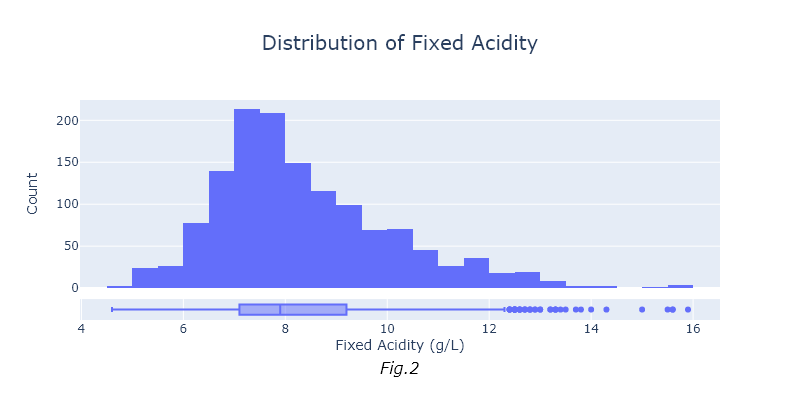


                count   mean    std  min  25%  50%  75%   max
fixed acidity  1359.0  8.311  1.737  4.6  7.1  7.9  9.2  15.9



In [11]:
hist_box_eda(
    df,
    "fixed acidity",
    "Fixed Acidity (g/L)",
    "Fig.2",
    render_mode,
)

In this dataset of 1,359 Vinho Verde samples, the `fixed acidity` averages 8.31 g/L with a standard deviation of 1.74 g/L, indicating moderate variation around the mean. Acidity values range from 4.6 to 15.9 g/L, with 50% of samples falling between 7.1 and 9.2 g/L, highlighting a typical concentration of fixed acidity in this range. The distribution is moderately positively skewed (*Fig.2*), with a bunch of potential outliers on the high end.

In [12]:
any_outliers_iqr(df, "fixed acidity").head()

There are 41 top outliers in 'fixed acidity' above 12.35


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
565,15.9,0.360,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5
385,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7
485,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
483,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
214,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7


In Vinho Verde wines, typical `fixed acidity` levels range from about 5.5 to 8.5 g/L. This acidity is key to the wine’s crisp and refreshing profile, though levels reaching 12-16 g/L are uncommon and could make the wine overly tart. High acidity is generally beneficial for freshness, especially in white and some red Vinho Verde styles like Vinhão, but 12-16 g/L would exceed usual standards.

Before EDA of all features is complete, it is somewhat too early to make decision about the outliers. They will be collected in one dataframe, a summary of the outliers across the whole dataset will be provided and decision will be taken in the EDA summary section, *Chapter 3.13*.

In [13]:
corr_bar(corr_matrix, "fixed acidity")

<style type="text/css">
#T_280ee th {
  white-space: normal;
  width: 50px;
}
#T_280ee td {
  width: 50px;
}
#T_280ee_row0_col0 {
  background-color: #b40426;
  color: #f1f1f1;
}
#T_280ee_row0_col1 {
  background-color: #bb1b2c;
  color: #f1f1f1;
}
#T_280ee_row0_col2 {
  background-color: #f7ad90;
  color: #000000;
}
#T_280ee_row0_col3, #T_280ee_row0_col4 {
  background-color: #f7b396;
  color: #000000;
}
#T_280ee_row0_col5 {
  background-color: #f2cbb7;
  color: #000000;
}
#T_280ee_row0_col6 {
  background-color: #d6dce4;
  color: #000000;
}
#T_280ee_row0_col7 {
  background-color: #d2dbe8;
  color: #000000;
}
#T_280ee_row0_col8 {
  background-color: #c1d4f4;
  color: #000000;
}
#T_280ee_row0_col9 {
  background-color: #a3c2fe;
  color: #000000;
}
#T_280ee_row0_col10 {
  background-color: #3b4cc0;
  color: #f1f1f1;
}
</style>
<table id="T_280ee" style="width: 55%;">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_280ee_level0_col0" class="col_heading level0 col0" >citric acid</th>
      <th id="T_280ee_level0_col1" class="col_heading level0 col1" >density</th>
      <th id="T_280ee_level0_col2" class="col_heading level0 col2" >chlorides</th>
      <th id="T_280ee_level0_col3" class="col_heading level0 col3" >residual sugar</th>
      <th id="T_280ee_level0_col4" class="col_heading level0 col4" >sulphates</th>
      <th id="T_280ee_level0_col5" class="col_heading level0 col5" >quality</th>
      <th id="T_280ee_level0_col6" class="col_heading level0 col6" >alcohol</th>
      <th id="T_280ee_level0_col7" class="col_heading level0 col7" >total sulfur dioxide</th>
      <th id="T_280ee_level0_col8" class="col_heading level0 col8" >free sulfur dioxide</th>
      <th id="T_280ee_level0_col9" class="col_heading level0 col9" >volatile acidity</th>
      <th id="T_280ee_level0_col10" class="col_heading level0 col10" >pH</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th id="T_280ee_level0_row0" class="row_heading level0 row0" >fixed acidity</th>
      <td id="T_280ee_row0_col0" class="data row0 col0" >0.657</td>
      <td id="T_280ee_row0_col1" class="data row0 col1" >0.627</td>
      <td id="T_280ee_row0_col2" class="data row0 col2" >0.244</td>
      <td id="T_280ee_row0_col3" class="data row0 col3" >0.222</td>
      <td id="T_280ee_row0_col4" class="data row0 col4" >0.221</td>
      <td id="T_280ee_row0_col5" class="data row0 col5" >0.112</td>
      <td id="T_280ee_row0_col6" class="data row0 col6" >-0.063</td>
      <td id="T_280ee_row0_col7" class="data row0 col7" >-0.084</td>
      <td id="T_280ee_row0_col8" class="data row0 col8" >-0.158</td>
      <td id="T_280ee_row0_col9" class="data row0 col9" >-0.280</td>
      <td id="T_280ee_row0_col10" class="data row0 col10" >-0.709</td>
    </tr>
  </tbody>
</table>


Correlation of `fixed acidity` shows strong positive relationship with `citric acid` and `density` (0.657 and 0.627 respectively), and strong negative relationship with `pH` (-0.709). The relationship between `pH` and `citric acid` with `fixed acidity` corresponds with insights derived from donmain knowledge. Noteably `fixed acidity` has weak or no relationships with the rest of the features. Same as with the outliers, correlations summary, including possible cases of **multicollinearity**, along with measures to be taken will be provided in the EDA summary section, *Chapter 3.13*.

### 3.3 Volatile Acidity
`Volatile acidity` in wine primarily refers to the presence of acetic acid, which is a byproduct of fermentation. It is typically measured in grams per liter (g/L), with acceptable levels varying depending on the type of wine. For red wines, including Vinho Verde, `volatile acidity` usually ranges from 0.5 to 1.5 g/L, with higher levels potentially indicating spoilage or poor fermentation practices. A high `volatile acidity` can lead to a vinegar-like taste, impacting the overall quality and enjoyment of the wine.

Level of `volatile acidity` significantly influences the flavor profile and aroma of wine. While a certain amount of `volatile acidity` can contribute to complexity and enhance certain characteristics, excessive levels can mask the fruitiness and freshness that are often desirable in wines. In Vinho Verde, which is known for its bright, crisp nature, maintaining lower levels of `volatile acidity` is crucial to preserve its refreshing qualities

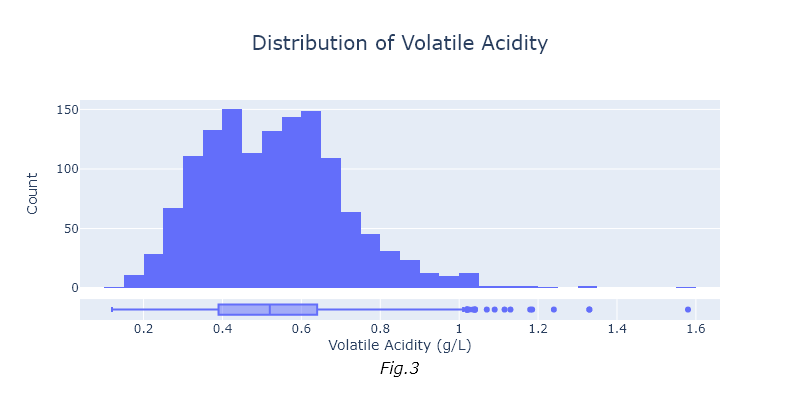


                   count   mean    std   min   25%   50%   75%   max
volatile acidity  1359.0  0.529  0.183  0.12  0.39  0.52  0.64  1.58



In [14]:
hist_box_eda(df, "volatile acidity", "Volatile Acidity (g/L)", "Fig.3", render_mode)

The statistical summary of `volatile acidity` includes 1,359 samples, with a mean of approximately 0.53 g/L and a standard deviation of 0.18 g/L, indicating moderate variability. The values range from a minimum of 0.12 g/L to a maximum of 1.58 g/L. The 25th percentile is 0.39 g/L, the median is 0.52 g/L, and the 75th percentile is 0.64 g/L, suggesting that most wines in this dataset exhibit relatively low levels of `volatile acidity`. The distribution has bimodal shape with a positive skew, as seen in *Fig.3*.

In [15]:
any_outliers_iqr(df, "volatile acidity").head()

There are 19 top outliers in 'volatile acidity' above 1.015


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1106,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3
114,8.2,1.330,0.00,1.70,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,5
115,8.1,1.330,0.00,1.80,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,5
582,9.8,1.240,0.34,2.00,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,5
597,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3


The dataset contains 19 outliers in `volatile acidity`, yet all fall within the acceptable range according to industry standards for red wines, including Vinho Verde. This indicates that while these values may be considered extreme compared to the main dataset, they do not represent a quality concern. Consequently, no further action will be taken regarding these outliers.

In [16]:
corr_bar(corr_matrix, "volatile acidity")

<style type="text/css">
#T_d473c th {
  white-space: normal;
  width: 50px;
}
#T_d473c td {
  width: 50px;
}
#T_d473c_row0_col0 {
  background-color: #b40426;
  color: #f1f1f1;
}
#T_d473c_row0_col1 {
  background-color: #d24b40;
  color: #f1f1f1;
}
#T_d473c_row0_col2 {
  background-color: #e97a5f;
  color: #f1f1f1;
}
#T_d473c_row0_col3 {
  background-color: #f4987a;
  color: #000000;
}
#T_d473c_row0_col4 {
  background-color: #f49a7b;
  color: #000000;
}
#T_d473c_row0_col5 {
  background-color: #f6a283;
  color: #000000;
}
#T_d473c_row0_col6 {
  background-color: #cfdaea;
  color: #000000;
}
#T_d473c_row0_col7 {
  background-color: #bbd1f8;
  color: #000000;
}
#T_d473c_row0_col8 {
  background-color: #aac7fd;
  color: #000000;
}
#T_d473c_row0_col9 {
  background-color: #90b2fe;
  color: #000000;
}
#T_d473c_row0_col10 {
  background-color: #3b4cc0;
  color: #f1f1f1;
}
</style>
<table id="T_d473c" style="width: 55%;">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_d473c_level0_col0" class="col_heading level0 col0" >pH</th>
      <th id="T_d473c_level0_col1" class="col_heading level0 col1" >chlorides</th>
      <th id="T_d473c_level0_col2" class="col_heading level0 col2" >total sulfur dioxide</th>
      <th id="T_d473c_level0_col3" class="col_heading level0 col3" >density</th>
      <th id="T_d473c_level0_col4" class="col_heading level0 col4" >residual sugar</th>
      <th id="T_d473c_level0_col5" class="col_heading level0 col5" >free sulfur dioxide</th>
      <th id="T_d473c_level0_col6" class="col_heading level0 col6" >alcohol</th>
      <th id="T_d473c_level0_col7" class="col_heading level0 col7" >fixed acidity</th>
      <th id="T_d473c_level0_col8" class="col_heading level0 col8" >sulphates</th>
      <th id="T_d473c_level0_col9" class="col_heading level0 col9" >quality</th>
      <th id="T_d473c_level0_col10" class="col_heading level0 col10" >citric acid</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th id="T_d473c_level0_row0" class="row_heading level0 row0" >volatile acidity</th>
      <td id="T_d473c_row0_col0" class="data row0 col0" >0.246</td>
      <td id="T_d473c_row0_col1" class="data row0 col1" >0.171</td>
      <td id="T_d473c_row0_col2" class="data row0 col2" >0.093</td>
      <td id="T_d473c_row0_col3" class="data row0 col3" >0.032</td>
      <td id="T_d473c_row0_col4" class="data row0 col4" >0.031</td>
      <td id="T_d473c_row0_col5" class="data row0 col5" >0.012</td>
      <td id="T_d473c_row0_col6" class="data row0 col6" >-0.226</td>
      <td id="T_d473c_row0_col7" class="data row0 col7" >-0.280</td>
      <td id="T_d473c_row0_col8" class="data row0 col8" >-0.324</td>
      <td id="T_d473c_row0_col9" class="data row0 col9" >-0.387</td>
      <td id="T_d473c_row0_col10" class="data row0 col10" >-0.611</td>
    </tr>
  </tbody>
</table>


`Volatile acidity` shows a moderate positive correlation with `pH` (0.246), indicating that as `volatile acidity` increases, `pH` tends to rise. The most significant negative correlation is with `citric acid` (-0.611), suggesting that higher `volatile acidity` is associated with lower `citric acid` levels. 

### 3.4 Citric Acid
In winemaking, `citric acid` serves multiple purposes, including enhancing acidity, contributing to flavor complexity, and acting as a preservative. It is measured in grams per liter (g/L), and its presence can significantly influence a wine's sensory characteristics. In terms of acceptable levels, `citric acid` is generally present in low concentrations in wines, typically ranging from 0.1 to 1.0 g/L. Higher concentrations can lead to an excessively sour taste, which may detract from the overall quality of the wine.

`Citric acid` plays a crucial role in the taste profile of wines. When present in balanced amounts, it can contribute to freshness and brightness, enhancing the wine's appeal. However, excessive levels may result in a wine that tastes overly tart or unbalanced. Understanding the role of `citric acid` is essential for winemakers aiming to create harmonious and well-structured wines.

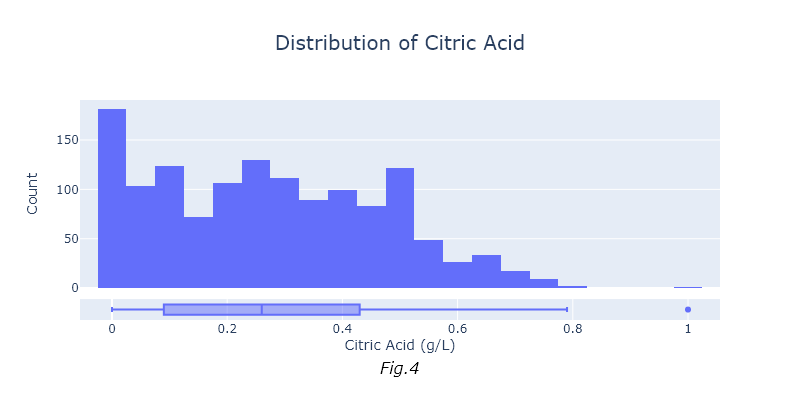


              count   mean    std  min   25%   50%   75%  max
citric acid  1359.0  0.272  0.196  0.0  0.09  0.26  0.43  1.0



In [17]:
hist_box_eda(df, "citric acid", "Citric Acid (g/L)", "Fig.4", render_mode)

The distribution of `citric acid` is right-skewed, most `citric acid` concentrations are at the lower end, with fewer higher concentrations. The box plot in *Fig. 4* confirms this skewness with a long tail extending towards higher concentrations. The summary of `citric acid` includes 1,359 samples, with a mean of approximately 0.27 g/L and a standard deviation of 0.20 g/L, indicating some variability in the data. The values range from a minimum of 0.0 g/L to a maximum of 1.0 g/L, with the 25th percentile at 0.09 g/L, the median at 0.26 g/L, and the 75th percentile at 0.43 g/L, suggesting that most wines in this dataset have relatively low levels of citric acid. There is one outlier with on the top, however, according to the domain knowledge it is at the acceptable level in red *Vinho Verde*. No action will be taken regarding the outlier.

In [18]:
any_outliers_iqr(df, "citric acid")

There are 1 top outliers in 'citric acid' above 0.94


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
135,9.2,0.52,1.0,3.4,0.61,32.0,69.0,0.9996,2.74,2.0,9.4,4


In [19]:
corr_bar(corr_matrix, "citric acid")

<style type="text/css">
#T_ef82a th {
  white-space: normal;
  width: 50px;
}
#T_ef82a td {
  width: 50px;
}
#T_ef82a_row0_col0 {
  background-color: #b40426;
  color: #f1f1f1;
}
#T_ef82a_row0_col1, #T_ef82a_row0_col2 {
  background-color: #f4987a;
  color: #000000;
}
#T_ef82a_row0_col3 {
  background-color: #f7bca1;
  color: #000000;
}
#T_ef82a_row0_col4 {
  background-color: #f3c7b1;
  color: #000000;
}
#T_ef82a_row0_col5 {
  background-color: #edd2c3;
  color: #000000;
}
#T_ef82a_row0_col6 {
  background-color: #ead5c9;
  color: #000000;
}
#T_ef82a_row0_col7 {
  background-color: #dcdddd;
  color: #000000;
}
#T_ef82a_row0_col8 {
  background-color: #cbd8ee;
  color: #000000;
}
#T_ef82a_row0_col9 {
  background-color: #465ecf;
  color: #f1f1f1;
}
#T_ef82a_row0_col10 {
  background-color: #3b4cc0;
  color: #f1f1f1;
}
</style>
<table id="T_ef82a" style="width: 55%;">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_ef82a_level0_col0" class="col_heading level0 col0" >fixed acidity</th>
      <th id="T_ef82a_level0_col1" class="col_heading level0 col1" >density</th>
      <th id="T_ef82a_level0_col2" class="col_heading level0 col2" >sulphates</th>
      <th id="T_ef82a_level0_col3" class="col_heading level0 col3" >quality</th>
      <th id="T_ef82a_level0_col4" class="col_heading level0 col4" >residual sugar</th>
      <th id="T_ef82a_level0_col5" class="col_heading level0 col5" >chlorides</th>
      <th id="T_ef82a_level0_col6" class="col_heading level0 col6" >alcohol</th>
      <th id="T_ef82a_level0_col7" class="col_heading level0 col7" >total sulfur dioxide</th>
      <th id="T_ef82a_level0_col8" class="col_heading level0 col8" >free sulfur dioxide</th>
      <th id="T_ef82a_level0_col9" class="col_heading level0 col9" >pH</th>
      <th id="T_ef82a_level0_col10" class="col_heading level0 col10" >volatile acidity</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th id="T_ef82a_level0_row0" class="row_heading level0 row0" >citric acid</th>
      <td id="T_ef82a_row0_col0" class="data row0 col0" >0.657</td>
      <td id="T_ef82a_row0_col1" class="data row0 col1" >0.344</td>
      <td id="T_ef82a_row0_col2" class="data row0 col2" >0.342</td>
      <td id="T_ef82a_row0_col3" class="data row0 col3" >0.219</td>
      <td id="T_ef82a_row0_col4" class="data row0 col4" >0.170</td>
      <td id="T_ef82a_row0_col5" class="data row0 col5" >0.111</td>
      <td id="T_ef82a_row0_col6" class="data row0 col6" >0.091</td>
      <td id="T_ef82a_row0_col7" class="data row0 col7" >0.021</td>
      <td id="T_ef82a_row0_col8" class="data row0 col8" >-0.060</td>
      <td id="T_ef82a_row0_col9" class="data row0 col9" >-0.559</td>
      <td id="T_ef82a_row0_col10" class="data row0 col10" >-0.611</td>
    </tr>
  </tbody>
</table>


The strongest correlations for `citric acid` are with `fixed acidity` (0.657), and `volatile acidity` (-0.611) and `pH` (-0.559), indicating a significant positive relationship with `fixed acidity` and a notable negative relationship with `volatile acidity` and `pH`. Other correlations include moderate positive relationships with `density` (0.344), `sulphates` (0.342), and `quality` (0.219), highlighting that higher citric acid levels may contribute to a denser wine and potentially enhance its quality.

### 3.5 Residual Sugar
`Residual sugar` refers to the amount of sugar remaining in wine after fermentation, measured in grams per liter (g/L). It plays a critical role in determining the wine's sweetness, body, and balance. The presence of `residual sugar` can enhance the overall flavor profile, contributing to a rounder mouthfeel and masking acidity. In general, wines with higher `residual sugar` levels tend to be sweeter and are often categorized as dessert wines, while those with lower levels are classified as dry wines.

Ranges of acceptable levels of the `residual sugar` in wine can vary widely depending on the style. For example, dry wines may contain less than 4 g/L, while off-dry and sweet wines can range from 5 g/L to over 100 g/L. Understanding the balance between `residual sugar` and acidity is crucial for winemakers, as this interplay significantly influences the wine's taste and overall quality. Excessive `residual sugar` can lead to a cloying mouthfeel and unbalanced flavor, while too little may result in a harsh or overly acidic profile.

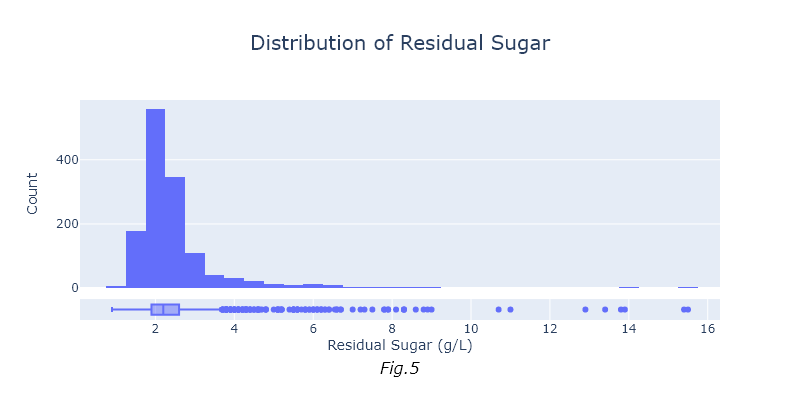


                 count   mean    std  min  25%  50%  75%   max
residual sugar  1359.0  2.523  1.352  0.9  1.9  2.2  2.6  15.5



In [20]:
hist_box_eda(df, "residual sugar", "Residual Sugar (g/L)", "Fig.5", render_mode)

The `residual sugar` variable has 1,359 observations with a mean of 2.52 g/L and a standard deviation of 1.35 g/L. The minimum value is 0.9 g/L, and the maximum is 15.5 g/L. The interquartile range is from 1.9 g/L (25th percentile) to 2.6 g/L (75th percentile), with a median of 2.2 g/L. The `residual sugar` distribution (*Fig.5*) is heavily positively skewed, with a high concentration of outliers just beyond the interquartile range and a smaller number extending further along the tail. This skewness indicates a majority of values clustered around lower residual sugar levels, with fewer, larger values creating the extended upper tail.

In [21]:
any_outliers_iqr(df, "residual sugar").head()

There are 126 top outliers in 'residual sugar' above 3.65


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
420,10.6,0.28,0.39,15.5,0.069,6.0,23.0,1.00260,3.12,0.66,9.2,5
1216,10.2,0.54,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6
1336,5.6,0.31,0.78,13.9,0.074,23.0,92.0,0.99677,3.39,0.48,10.5,6
1250,9.9,0.50,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5
1060,5.9,0.29,0.25,13.4,0.067,72.0,160.0,0.99721,3.33,0.54,10.3,6


Statistically, there are 126 outliers at the higher end of `residual sugar` values. However, based on domain knowledge, these values are typical for wines that are off-dry or sweet, indicating that these observations, while statistically defined as outliers, are not unusual within the context of this wine category.

In [22]:
corr_bar(corr_matrix, "residual sugar")

<style type="text/css">
#T_33a75 th {
  white-space: normal;
  width: 50px;
}
#T_33a75 td {
  width: 50px;
}
#T_33a75_row0_col0 {
  background-color: #b40426;
  color: #f1f1f1;
}
#T_33a75_row0_col1 {
  background-color: #f4c6af;
  color: #000000;
}
#T_33a75_row0_col2 {
  background-color: #f2c9b4;
  color: #000000;
}
#T_33a75_row0_col3 {
  background-color: #e1dad6;
  color: #000000;
}
#T_33a75_row0_col4 {
  background-color: #d2dbe8;
  color: #000000;
}
#T_33a75_row0_col5 {
  background-color: #c1d4f4;
  color: #000000;
}
#T_33a75_row0_col6 {
  background-color: #aac7fd;
  color: #000000;
}
#T_33a75_row0_col7 {
  background-color: #8badfd;
  color: #000000;
}
#T_33a75_row0_col8 {
  background-color: #89acfd;
  color: #000000;
}
#T_33a75_row0_col9 {
  background-color: #86a9fc;
  color: #f1f1f1;
}
#T_33a75_row0_col10 {
  background-color: #3b4cc0;
  color: #f1f1f1;
}
</style>
<table id="T_33a75" style="width: 55%;">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_33a75_level0_col0" class="col_heading level0 col0" >density</th>
      <th id="T_33a75_level0_col1" class="col_heading level0 col1" >fixed acidity</th>
      <th id="T_33a75_level0_col2" class="col_heading level0 col2" >chlorides</th>
      <th id="T_33a75_level0_col3" class="col_heading level0 col3" >citric acid</th>
      <th id="T_33a75_level0_col4" class="col_heading level0 col4" >total sulfur dioxide</th>
      <th id="T_33a75_level0_col5" class="col_heading level0 col5" >alcohol</th>
      <th id="T_33a75_level0_col6" class="col_heading level0 col6" >free sulfur dioxide</th>
      <th id="T_33a75_level0_col7" class="col_heading level0 col7" >volatile acidity</th>
      <th id="T_33a75_level0_col8" class="col_heading level0 col8" >sulphates</th>
      <th id="T_33a75_level0_col9" class="col_heading level0 col9" >quality</th>
      <th id="T_33a75_level0_col10" class="col_heading level0 col10" >pH</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th id="T_33a75_level0_row0" class="row_heading level0 row0" >residual sugar</th>
      <td id="T_33a75_row0_col0" class="data row0 col0" >0.414</td>
      <td id="T_33a75_row0_col1" class="data row0 col1" >0.222</td>
      <td id="T_33a75_row0_col2" class="data row0 col2" >0.216</td>
      <td id="T_33a75_row0_col3" class="data row0 col3" >0.170</td>
      <td id="T_33a75_row0_col4" class="data row0 col4" >0.142</td>
      <td id="T_33a75_row0_col5" class="data row0 col5" >0.112</td>
      <td id="T_33a75_row0_col6" class="data row0 col6" >0.078</td>
      <td id="T_33a75_row0_col7" class="data row0 col7" >0.031</td>
      <td id="T_33a75_row0_col8" class="data row0 col8" >0.030</td>
      <td id="T_33a75_row0_col9" class="data row0 col9" >0.026</td>
      <td id="T_33a75_row0_col10" class="data row0 col10" >-0.092</td>
    </tr>
  </tbody>
</table>


`Residual sugar` shows a moderate 
positive correlation with `density`, while its relationship with other features is either weak or nonexistent. This suggests that variations in residual sugar levels have limited influence on most other characteristics in the dataset.

### 3.6 Chlorides
`Chlorides`, measured in grams per liter (g/L), reflect the salt concentration in wine, subtly impacting mouthfeel and flavor. `Chloride` levels in red wines typically range from 0.01 to 0.2 g/L, with Vinho Verde tinto generally on the lower end to maintain its fresh, crisp character. These levels can impart a touch of salinity or minerality, especially in wines from coastal areas. However, winemakers monitor `chloride` levels carefully, as excessive chloride can introduce bitterness, which may detract from the wine's overall quality and balance.

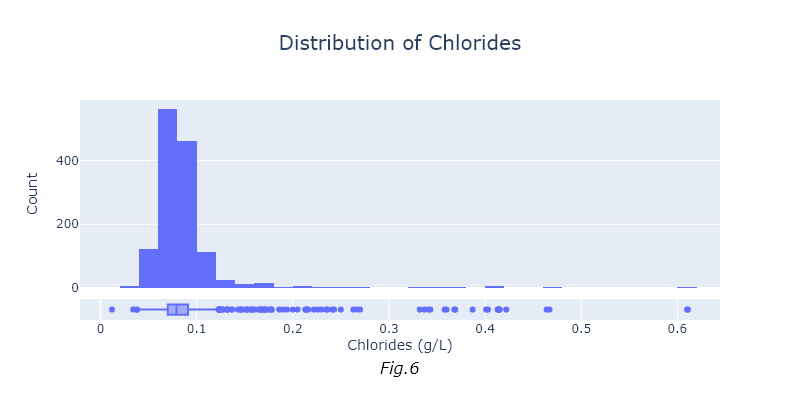


            count   mean    std    min   25%    50%    75%    max
chlorides  1359.0  0.088  0.049  0.012  0.07  0.079  0.091  0.611



In [23]:
hist_box_eda(df, "chlorides", "Chlorides (g/L)", "Fig.6", render_mode)

The `chlorides` variable has a mean of 0.088 g/L and a standard deviation of 0.049 g/L. The minimum value is 0.012 g/L, and the maximum reaches 0.611 g/L, indicating a wide range. The interquartile range (IQR) is from 0.070 g/L (25th percentile) to 0.091 g/L (75th percentile), with a median of 0.079 g/L. The distribution is positively skewed, as shown in *Fig.6*, by the presence of higher outliers extending the upper range.

In [24]:
any_outliers_iqr(df, "chlorides").tail(4)

There are 4 bottom outliers in 'chlorides' below 0.0385
There are 83 top outliers in 'chlorides' above 0.1225


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
689,9.3,0.37,0.44,1.6,0.038,21.0,42.0,0.99526,3.24,0.81,10.8,7
1333,6.4,0.38,0.14,2.2,0.038,15.0,25.0,0.99514,3.44,0.65,11.1,6
602,5.1,0.47,0.02,1.3,0.034,18.0,44.0,0.99210,3.90,0.62,12.8,6
722,6.7,0.28,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7


In [25]:
any_outliers_iqr(df, "chlorides").head()

There are 4 bottom outliers in 'chlorides' below 0.0385
There are 83 top outliers in 'chlorides' above 0.1225


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
226,7.7,0.41,0.76,1.8,0.611,8.0,45.0,0.9968,3.06,1.26,9.4,5
135,9.2,0.52,1.00,3.4,0.610,32.0,69.0,0.9996,2.74,2.00,9.4,4
96,7.8,0.41,0.68,1.7,0.467,18.0,69.0,0.9973,3.08,1.31,9.3,5
75,7.8,0.43,0.70,1.9,0.464,22.0,67.0,0.9974,3.13,1.28,9.4,5
599,8.6,0.49,0.51,2.0,0.422,16.0,62.0,0.9979,3.03,1.17,9.0,5


The 4 bottom outliers in `chlorides` values are withing acceptable boundaries based on the domain knowledge. Major part of the 83 top outliers are, however, above the specified levels, usual in the winemaking industry.

As already discussed, information about outliers will be summarized and analyzed in *Chapter 3.13*.

In [26]:
corr_bar(corr_matrix, "chlorides")

<style type="text/css">
#T_d0833 th {
  white-space: normal;
  width: 50px;
}
#T_d0833 td {
  width: 50px;
}
#T_d0833_row0_col0 {
  background-color: #b40426;
  color: #f1f1f1;
}
#T_d0833_row0_col1 {
  background-color: #f39778;
  color: #000000;
}
#T_d0833_row0_col2 {
  background-color: #f7a688;
  color: #000000;
}
#T_d0833_row0_col3 {
  background-color: #f7bca1;
  color: #000000;
}
#T_d0833_row0_col4 {
  background-color: #f3c7b1;
  color: #000000;
}
#T_d0833_row0_col5 {
  background-color: #edd1c2;
  color: #000000;
}
#T_d0833_row0_col6 {
  background-color: #d3dbe7;
  color: #000000;
}
#T_d0833_row0_col7 {
  background-color: #cad8ef;
  color: #000000;
}
#T_d0833_row0_col8 {
  background-color: #6485ec;
  color: #f1f1f1;
}
#T_d0833_row0_col9 {
  background-color: #5673e0;
  color: #f1f1f1;
}
#T_d0833_row0_col10 {
  background-color: #3b4cc0;
  color: #f1f1f1;
}
</style>
<table id="T_d0833" style="width: 55%;">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_d0833_level0_col0" class="col_heading level0 col0" >density</th>
      <th id="T_d0833_level0_col1" class="col_heading level0 col1" >fixed acidity</th>
      <th id="T_d0833_level0_col2" class="col_heading level0 col2" >residual sugar</th>
      <th id="T_d0833_level0_col3" class="col_heading level0 col3" >volatile acidity</th>
      <th id="T_d0833_level0_col4" class="col_heading level0 col4" >total sulfur dioxide</th>
      <th id="T_d0833_level0_col5" class="col_heading level0 col5" >citric acid</th>
      <th id="T_d0833_level0_col6" class="col_heading level0 col6" >sulphates</th>
      <th id="T_d0833_level0_col7" class="col_heading level0 col7" >free sulfur dioxide</th>
      <th id="T_d0833_level0_col8" class="col_heading level0 col8" >quality</th>
      <th id="T_d0833_level0_col9" class="col_heading level0 col9" >pH</th>
      <th id="T_d0833_level0_col10" class="col_heading level0 col10" >alcohol</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th id="T_d0833_level0_row0" class="row_heading level0 row0" >chlorides</th>
      <td id="T_d0833_row0_col0" class="data row0 col0" >0.421</td>
      <td id="T_d0833_row0_col1" class="data row0 col1" >0.244</td>
      <td id="T_d0833_row0_col2" class="data row0 col2" >0.216</td>
      <td id="T_d0833_row0_col3" class="data row0 col3" >0.171</td>
      <td id="T_d0833_row0_col4" class="data row0 col4" >0.141</td>
      <td id="T_d0833_row0_col5" class="data row0 col5" >0.111</td>
      <td id="T_d0833_row0_col6" class="data row0 col6" >0.034</td>
      <td id="T_d0833_row0_col7" class="data row0 col7" >0.010</td>
      <td id="T_d0833_row0_col8" class="data row0 col8" >-0.204</td>
      <td id="T_d0833_row0_col9" class="data row0 col9" >-0.234</td>
      <td id="T_d0833_row0_col10" class="data row0 col10" >-0.302</td>
    </tr>
  </tbody>
</table>


`Chlorides` exhibit moderate positive correlations with `density` (0.421) and moderate negative correlations with `alcohol`, `pH` and `quality` (-0.302, -0.234 and -0.204 respectively). The remaining correlations are weak or negligible, indicating limited relationships with other features.

### 3.7 Free Sulfur Dioxide
`Free sulfur dioxide` (SO₂), measured in milligrams per liter (mg/L), acts as a key preservative in winemaking, protecting against oxidation and microbial spoilage. In red wines, including Vinho Verde tinto, typical `free SO₂` levels fall between 10 and 35 mg/L. The natural tannins in red wines allow for lower SO₂ use compared to whites. Vinho Verde tinto, known for its bright, fruit-forward style, generally maintains moderate SO₂ levels to support freshness without overpowering the delicate flavors. `Free SO₂`also contributes to the wine’s stability, extending its shelf life while keeping the youthful character intact.

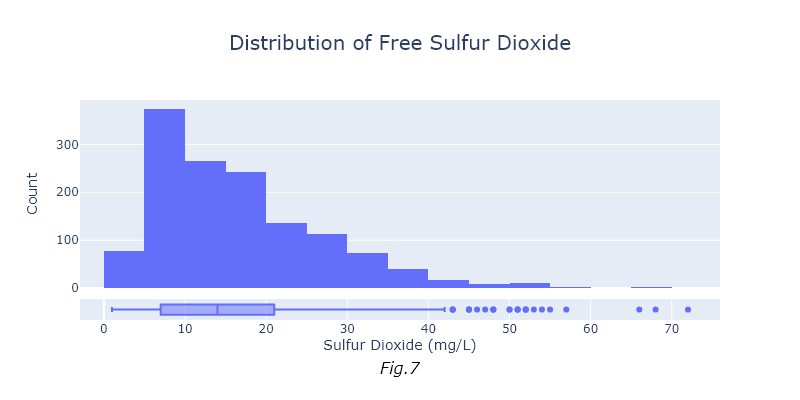


                      count    mean     std  min  25%   50%   75%   max
free sulfur dioxide  1359.0  15.893  10.447  1.0  7.0  14.0  21.0  72.0



In [27]:
hist_box_eda(df, "free sulfur dioxide", "Sulfur Dioxide (mg/L)", "Fig.7", render_mode)

The `free sulfur dioxide` variable has a mean of 15.89 mg/L and a standard deviation of 10.45 mg/L. Values range from a minimum of 1.0 mg/L to a maximum of 72.0 mg/L, indicating significant variability. The interquartile range (IQR) spans from 7.0 mg/L (25th percentile) to 21.0 mg/L (75th percentile), with a median of 14.0 mg/L. As shown in *Fig.7*, the distribution is positively skewed, with a concentration of values at lower levels and some higher outliers extending the range.

In [28]:
any_outliers_iqr(df, "free sulfur dioxide").head()

There are 26 top outliers in 'free sulfur dioxide' above 42.0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1060,5.9,0.290,0.25,13.4,0.067,72.0,160.0,0.99721,3.33,0.54,10.3,6
346,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
1325,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,5
963,5.9,0.190,0.21,1.7,0.045,57.0,135.0,0.99341,3.32,0.44,9.5,5
1216,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6


There are 26 top end outliers in `free sulfur dioxide` in a range from 43 mg/L to 72 mg/L. These levels are beyond the usual range of 10 to 35 mg/L.

In [29]:
corr_bar(corr_matrix, "free sulfur dioxide")

<style type="text/css">
#T_51065 th {
  white-space: normal;
  width: 50px;
}
#T_51065 td {
  width: 50px;
}
#T_51065_row0_col0 {
  background-color: #b40426;
  color: #f1f1f1;
}
#T_51065_row0_col1 {
  background-color: #92b4fe;
  color: #000000;
}
#T_51065_row0_col2 {
  background-color: #8caffe;
  color: #000000;
}
#T_51065_row0_col3 {
  background-color: #7ea1fa;
  color: #f1f1f1;
}
#T_51065_row0_col4, #T_51065_row0_col5 {
  background-color: #7396f5;
  color: #f1f1f1;
}
#T_51065_row0_col6 {
  background-color: #6687ed;
  color: #f1f1f1;
}
#T_51065_row0_col7, #T_51065_row0_col8 {
  background-color: #5a78e4;
  color: #f1f1f1;
}
#T_51065_row0_col9 {
  background-color: #4c66d6;
  color: #f1f1f1;
}
#T_51065_row0_col10 {
  background-color: #3b4cc0;
  color: #f1f1f1;
}
</style>
<table id="T_51065" style="width: 55%;">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_51065_level0_col0" class="col_heading level0 col0" >total sulfur dioxide</th>
      <th id="T_51065_level0_col1" class="col_heading level0 col1" >pH</th>
      <th id="T_51065_level0_col2" class="col_heading level0 col2" >residual sugar</th>
      <th id="T_51065_level0_col3" class="col_heading level0 col3" >sulphates</th>
      <th id="T_51065_level0_col4" class="col_heading level0 col4" >volatile acidity</th>
      <th id="T_51065_level0_col5" class="col_heading level0 col5" >chlorides</th>
      <th id="T_51065_level0_col6" class="col_heading level0 col6" >density</th>
      <th id="T_51065_level0_col7" class="col_heading level0 col7" >quality</th>
      <th id="T_51065_level0_col8" class="col_heading level0 col8" >citric acid</th>
      <th id="T_51065_level0_col9" class="col_heading level0 col9" >alcohol</th>
      <th id="T_51065_level0_col10" class="col_heading level0 col10" >fixed acidity</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th id="T_51065_level0_row0" class="row_heading level0 row0" >free sulfur dioxide</th>
      <td id="T_51065_row0_col0" class="data row0 col0" >0.790</td>
      <td id="T_51065_row0_col1" class="data row0 col1" >0.091</td>
      <td id="T_51065_row0_col2" class="data row0 col2" >0.078</td>
      <td id="T_51065_row0_col3" class="data row0 col3" >0.041</td>
      <td id="T_51065_row0_col4" class="data row0 col4" >0.012</td>
      <td id="T_51065_row0_col5" class="data row0 col5" >0.010</td>
      <td id="T_51065_row0_col6" class="data row0 col6" >-0.026</td>
      <td id="T_51065_row0_col7" class="data row0 col7" >-0.059</td>
      <td id="T_51065_row0_col8" class="data row0 col8" >-0.060</td>
      <td id="T_51065_row0_col9" class="data row0 col9" >-0.099</td>
      <td id="T_51065_row0_col10" class="data row0 col10" >-0.158</td>
    </tr>
  </tbody>
</table>


There is a strong positive correlation between `free sulfur dioxide` and `total sulfur dioxide` (0.790), indicating that higher levels of free SO₂ are associated with increased total SO₂ levels. This relationship is expected since free SO₂ contributes to the total measurement. The remaining correlations are weak or negligible, indicating limited relationships with other features.

### 3.8 Total Sulfur Dioxide
`Total sulfur dioxide` combines both free and bound SO₂, providing a fuller picture of sulfur’s preservative role in the wine. Measured in mg/L, `total SO₂` levels in red wines typically range from 50 to 150 mg/L, with Vinho Verde tinto often on the lower end to preserve its fresh and approachable taste. Higher SO₂ levels may be used for wines intended for long aging, but in Vinho Verde, lower levels are preferred to keep the wine vibrant and avoid masking its natural fruitiness. This approach aligns with the wine’s intended style, which is generally light, youthful, and meant for early consumption.

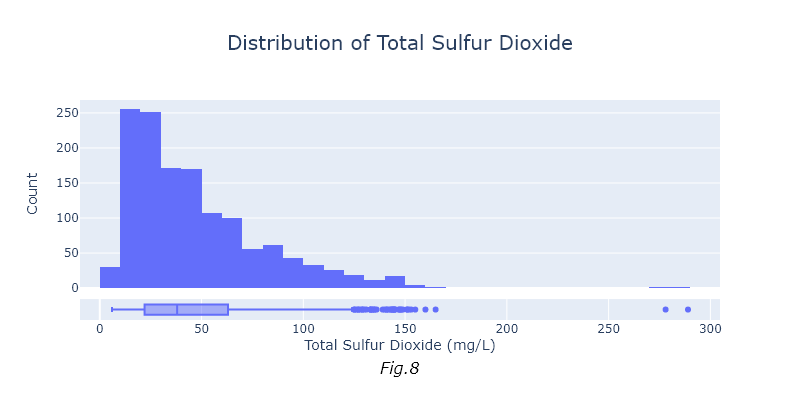


                       count    mean     std  min   25%   50%   75%    max
total sulfur dioxide  1359.0  46.826  33.409  6.0  22.0  38.0  63.0  289.0



In [30]:
hist_box_eda(
    df, "total sulfur dioxide", "Total Sulfur Dioxide (mg/L)", "Fig.8", render_mode
)

The `total sulfur dioxide` variable has a mean of 46.826 mg/L and a standard deviation of 33.409 mg/L. The minimum value is 6.0 mg/L, while the maximum value reaches 289.0 mg/L, indicating a wide range of values. The interquartile range (IQR) is from 22.0 mg/L (25th percentile) to 63.0 mg/L (75th percentile), with a median of 38.0 mg/L. The distribution appears positively skewed, as indicated by the higher maximum value relative to the mean, suggesting the presence of outliers in the upper range (*Fig.8*).

In [31]:
any_outliers_iqr(df, "total sulfur dioxide").head()

There are 45 top outliers in 'total sulfur dioxide' above 124.5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
920,7.9,0.30,0.68,8.3,0.050,37.5,289.0,0.99316,3.01,0.51,12.3,7
918,7.9,0.30,0.68,8.3,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,7
309,6.1,0.21,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
1060,5.9,0.29,0.25,13.4,0.067,72.0,160.0,0.99721,3.33,0.54,10.3,6
564,9.8,0.88,0.25,2.5,0.104,35.0,155.0,1.00100,3.41,0.67,11.2,5


Based on domain knowledge, appropriate levels of `total sulfur dioxide` in the winemaking industry typically range from 50 to 150 mg/L, with *Vinho Verde* wines usually falling on the lower end of this spectrum. The observed mean of 46.826 mg/L is close to this recommended range, indicating that most samples are within acceptable limits. However, there are two notable outliers—index 920 and index 918—with `total sulfur dioxide` levels of 289.0 mg/L and 278.0 mg/L, respectively. These extreme values warrant special attention in the EDA summary (*Chapter 3.13.4*), as they exceed the typical maximum levels and may impact the overall quality and safety of the wine. Monitoring and addressing these outliers is essential for ensuring the quality and integrity of the wine produced.

In [32]:
corr_bar(corr_matrix, "total sulfur dioxide")

<style type="text/css">
#T_69e7d th {
  white-space: normal;
  width: 50px;
}
#T_69e7d td {
  width: 50px;
}
#T_69e7d_row0_col0 {
  background-color: #b40426;
  color: #f1f1f1;
}
#T_69e7d_row0_col1, #T_69e7d_row0_col2 {
  background-color: #bed2f6;
  color: #000000;
}
#T_69e7d_row0_col3 {
  background-color: #bcd2f7;
  color: #000000;
}
#T_69e7d_row0_col4 {
  background-color: #aec9fc;
  color: #000000;
}
#T_69e7d_row0_col5 {
  background-color: #97b8ff;
  color: #000000;
}
#T_69e7d_row0_col6 {
  background-color: #8db0fe;
  color: #000000;
}
#T_69e7d_row0_col7 {
  background-color: #86a9fc;
  color: #f1f1f1;
}
#T_69e7d_row0_col8 {
  background-color: #7597f6;
  color: #f1f1f1;
}
#T_69e7d_row0_col9 {
  background-color: #506bda;
  color: #f1f1f1;
}
#T_69e7d_row0_col10 {
  background-color: #3b4cc0;
  color: #f1f1f1;
}
</style>
<table id="T_69e7d" style="width: 55%;">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_69e7d_level0_col0" class="col_heading level0 col0" >free sulfur dioxide</th>
      <th id="T_69e7d_level0_col1" class="col_heading level0 col1" >residual sugar</th>
      <th id="T_69e7d_level0_col2" class="col_heading level0 col2" >chlorides</th>
      <th id="T_69e7d_level0_col3" class="col_heading level0 col3" >density</th>
      <th id="T_69e7d_level0_col4" class="col_heading level0 col4" >volatile acidity</th>
      <th id="T_69e7d_level0_col5" class="col_heading level0 col5" >citric acid</th>
      <th id="T_69e7d_level0_col6" class="col_heading level0 col6" >sulphates</th>
      <th id="T_69e7d_level0_col7" class="col_heading level0 col7" >pH</th>
      <th id="T_69e7d_level0_col8" class="col_heading level0 col8" >fixed acidity</th>
      <th id="T_69e7d_level0_col9" class="col_heading level0 col9" >quality</th>
      <th id="T_69e7d_level0_col10" class="col_heading level0 col10" >alcohol</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th id="T_69e7d_level0_row0" class="row_heading level0 row0" >total sulfur dioxide</th>
      <td id="T_69e7d_row0_col0" class="data row0 col0" >0.790</td>
      <td id="T_69e7d_row0_col1" class="data row0 col1" >0.142</td>
      <td id="T_69e7d_row0_col2" class="data row0 col2" >0.141</td>
      <td id="T_69e7d_row0_col3" class="data row0 col3" >0.137</td>
      <td id="T_69e7d_row0_col4" class="data row0 col4" >0.093</td>
      <td id="T_69e7d_row0_col5" class="data row0 col5" >0.021</td>
      <td id="T_69e7d_row0_col6" class="data row0 col6" >-0.008</td>
      <td id="T_69e7d_row0_col7" class="data row0 col7" >-0.030</td>
      <td id="T_69e7d_row0_col8" class="data row0 col8" >-0.084</td>
      <td id="T_69e7d_row0_col9" class="data row0 col9" >-0.197</td>
      <td id="T_69e7d_row0_col10" class="data row0 col10" >-0.275</td>
    </tr>
  </tbody>
</table>


There is a strong positive correlation between `total sulfur dioxide` and `free sulfur dioxide`, indicating that higher levels of `total SO₂` are closely associated with increased levels of `free SO₂`. This relationship is expected based on domain knowledge, as `free SO₂` is a component of `total SO₂`.  `Total sulfur dioxide` also exhibits weak positive correlations with `residual sugar` and negative correlations with `quality` and `alcohol`. The remaining correlations are weak or negligible.

### 3.9 Density
`Density`, measured in grams per cubic centimeter (g/cm³), provides insight into the wine's composition, especially its sugar and alcohol content. For dry red wines, `density` usually ranges from 0.990 to 1.005 g/cm³. *Vinho Verde* tinto tends to fall on the lower end of this range due to its low residual sugar and modest alcohol levels, reflecting its refreshing, light-bodied profile. This lower density contributes to a clean, crisp mouthfeel and distinguishes *Vinho Verde* from richer, denser reds. `Density` in wine can also give a hint about sweetness; higher values often indicate higher residual sugar, though *Vinho Verde’s* `density` supports its dry style.

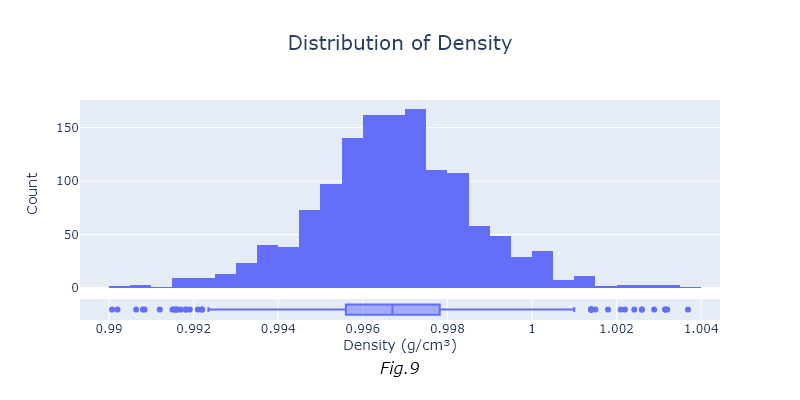


          count   mean    std   min    25%    50%    75%    max
density  1359.0  0.997  0.002  0.99  0.996  0.997  0.998  1.004



In [33]:
hist_box_eda(df, "density", "Density (g/cm³)", "Fig.9", render_mode)

The `density` variable has a mean of 0.997 g/cm³ and a standard deviation of 0.002 g/cm³. The minimum density recorded is 0.990 g/cm³, while the maximum is 1.004 g/cm³, indicating a narrow range of values. The interquartile range (IQR) is from 0.996 g/cm³ (25th percentile) to 0.998 g/cm³ (75th percentile), with a median also at 0.997 g/cm³. The distribution (*Fig.9*) appears to be relatively normal, with most values clustering around the mean, suggesting consistency in `density` among the samples.

In [34]:
any_outliers_iqr(df, "density").head()

There are 18 bottom outliers in 'density' below 0.99227
There are 17 top outliers in 'density' above 1.00115


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1216,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6
385,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7
485,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
483,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
764,10.7,0.900,0.34,6.6,0.112,23.0,99.0,1.00289,3.22,0.68,9.3,5


There are 35 total number of outliers in `density`, which are equally split in both ends of the distribution (18 in the low end and 17 in the high end). Eventhough statistically these values are outliers in the dataset, they are within acceptable boundaries according to the domain knowledge.

In [35]:
corr_bar(corr_matrix, "density")

<style type="text/css">
#T_4794b th {
  white-space: normal;
  width: 50px;
}
#T_4794b td {
  width: 50px;
}
#T_4794b_row0_col0 {
  background-color: #b40426;
  color: #f1f1f1;
}
#T_4794b_row0_col1 {
  background-color: #ec7f63;
  color: #f1f1f1;
}
#T_4794b_row0_col2 {
  background-color: #ec8165;
  color: #f1f1f1;
}
#T_4794b_row0_col3 {
  background-color: #f59c7d;
  color: #000000;
}
#T_4794b_row0_col4 {
  background-color: #edd1c2;
  color: #000000;
}
#T_4794b_row0_col5 {
  background-color: #ead5c9;
  color: #000000;
}
#T_4794b_row0_col6 {
  background-color: #d2dbe8;
  color: #000000;
}
#T_4794b_row0_col7 {
  background-color: #c1d4f4;
  color: #000000;
}
#T_4794b_row0_col8 {
  background-color: #90b2fe;
  color: #000000;
}
#T_4794b_row0_col9 {
  background-color: #6485ec;
  color: #f1f1f1;
}
#T_4794b_row0_col10 {
  background-color: #3b4cc0;
  color: #f1f1f1;
}
</style>
<table id="T_4794b" style="width: 55%;">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_4794b_level0_col0" class="col_heading level0 col0" >fixed acidity</th>
      <th id="T_4794b_level0_col1" class="col_heading level0 col1" >chlorides</th>
      <th id="T_4794b_level0_col2" class="col_heading level0 col2" >residual sugar</th>
      <th id="T_4794b_level0_col3" class="col_heading level0 col3" >citric acid</th>
      <th id="T_4794b_level0_col4" class="col_heading level0 col4" >sulphates</th>
      <th id="T_4794b_level0_col5" class="col_heading level0 col5" >total sulfur dioxide</th>
      <th id="T_4794b_level0_col6" class="col_heading level0 col6" >volatile acidity</th>
      <th id="T_4794b_level0_col7" class="col_heading level0 col7" >free sulfur dioxide</th>
      <th id="T_4794b_level0_col8" class="col_heading level0 col8" >quality</th>
      <th id="T_4794b_level0_col9" class="col_heading level0 col9" >pH</th>
      <th id="T_4794b_level0_col10" class="col_heading level0 col10" >alcohol</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th id="T_4794b_level0_row0" class="row_heading level0 row0" >density</th>
      <td id="T_4794b_row0_col0" class="data row0 col0" >0.627</td>
      <td id="T_4794b_row0_col1" class="data row0 col1" >0.421</td>
      <td id="T_4794b_row0_col2" class="data row0 col2" >0.414</td>
      <td id="T_4794b_row0_col3" class="data row0 col3" >0.344</td>
      <td id="T_4794b_row0_col4" class="data row0 col4" >0.158</td>
      <td id="T_4794b_row0_col5" class="data row0 col5" >0.137</td>
      <td id="T_4794b_row0_col6" class="data row0 col6" >0.032</td>
      <td id="T_4794b_row0_col7" class="data row0 col7" >-0.026</td>
      <td id="T_4794b_row0_col8" class="data row0 col8" >-0.184</td>
      <td id="T_4794b_row0_col9" class="data row0 col9" >-0.323</td>
      <td id="T_4794b_row0_col10" class="data row0 col10" >-0.470</td>
    </tr>
  </tbody>
</table>


`Density` exhibits strong positive correlations with `fixed acidity` (0.627), moderate positive correlations with `chlorides` (0.421) and `residual sugar` (0.414), and a moderate negative correlation with `alcohol` (-0.470). There are also moderate negative correlations with `pH` (-0.323) and weak correlations with the remaining features, indicating varied relationships with other characteristics in the wines.

### 3.10 pH
`pH`, a measure of acidity, typically ranges from 3.1 to 4.0 in red wines, influencing stability, flavor, and color. *Vinho Verde* tinto usually has `pH` values between 3.1 and 3.4, reflecting higher acidity that enhances its fresh, lively character. This elevated acidity contributes to *Vinho Verde’s* signature brightness, making it a refreshing choice for warm weather. The acidic structure also helps with preservation and pairs well with its light body, allowing the wine’s fruity and floral notes to shine while remaining well-balanced.

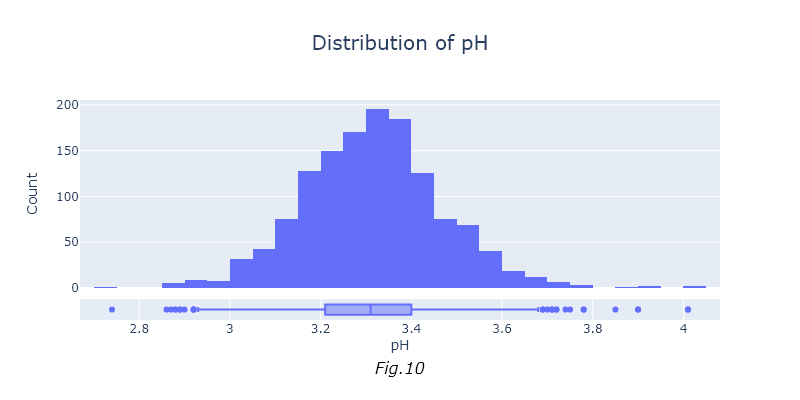


     count  mean    std   min   25%   50%  75%   max
pH  1359.0  3.31  0.155  2.74  3.21  3.31  3.4  4.01



In [36]:
hist_box_eda(df, "pH", "pH", "Fig.10", render_mode)

`pH` in this dataset has a mean of 3.31 and a standard deviation of 0.155. The minimum `pH` value recorded is 2.74, while the maximum reaches 4.01, indicating a tively narrow range. The interquartile range (IQR) spans from 3.21 (25th percentile) to 3.40 (75th percentile), with a median also at 3.31. The distribution of `pH` values appears to be slightly skewed, but overall, most samples cluster around the mean, reflecting typical acidity levels in wines, particularly within the acceptable range for *Vinho Verde*.

In [37]:
any_outliers_iqr(df, "pH").head()

There are 11 bottom outliers in 'pH' below 2.925
There are 17 top outliers in 'pH' above 3.685


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1125,5.0,0.74,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6
1121,5.4,0.74,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6
41,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4
602,5.1,0.47,0.02,1.3,0.034,18.0,44.0,0.99210,3.90,0.62,12.8,6
87,4.7,0.60,0.17,2.3,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,6


Statistically there are 28 outliers in `pH`, however, as already mentioned, all of them are within typical range of levels for *Vinho Verde*.

In [38]:
corr_bar(corr_matrix, "pH")

<style type="text/css">
#T_87cb8 th {
  white-space: normal;
  width: 50px;
}
#T_87cb8 td {
  width: 50px;
}
#T_87cb8_row0_col0 {
  background-color: #b40426;
  color: #f1f1f1;
}
#T_87cb8_row0_col1 {
  background-color: #cb3e38;
  color: #f1f1f1;
}
#T_87cb8_row0_col2 {
  background-color: #e67259;
  color: #f1f1f1;
}
#T_87cb8_row0_col3 {
  background-color: #f7a889;
  color: #000000;
}
#T_87cb8_row0_col4 {
  background-color: #f7ad90;
  color: #000000;
}
#T_87cb8_row0_col5 {
  background-color: #f6bea4;
  color: #000000;
}
#T_87cb8_row0_col6 {
  background-color: #f5c0a7;
  color: #000000;
}
#T_87cb8_row0_col7 {
  background-color: #dcdddd;
  color: #000000;
}
#T_87cb8_row0_col8 {
  background-color: #c1d4f4;
  color: #000000;
}
#T_87cb8_row0_col9 {
  background-color: #6c8ff1;
  color: #f1f1f1;
}
#T_87cb8_row0_col10 {
  background-color: #3b4cc0;
  color: #f1f1f1;
}
</style>
<table id="T_87cb8" style="width: 55%;">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_87cb8_level0_col0" class="col_heading level0 col0" >volatile acidity</th>
      <th id="T_87cb8_level0_col1" class="col_heading level0 col1" >alcohol</th>
      <th id="T_87cb8_level0_col2" class="col_heading level0 col2" >free sulfur dioxide</th>
      <th id="T_87cb8_level0_col3" class="col_heading level0 col3" >total sulfur dioxide</th>
      <th id="T_87cb8_level0_col4" class="col_heading level0 col4" >quality</th>
      <th id="T_87cb8_level0_col5" class="col_heading level0 col5" >residual sugar</th>
      <th id="T_87cb8_level0_col6" class="col_heading level0 col6" >sulphates</th>
      <th id="T_87cb8_level0_col7" class="col_heading level0 col7" >chlorides</th>
      <th id="T_87cb8_level0_col8" class="col_heading level0 col8" >density</th>
      <th id="T_87cb8_level0_col9" class="col_heading level0 col9" >citric acid</th>
      <th id="T_87cb8_level0_col10" class="col_heading level0 col10" >fixed acidity</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th id="T_87cb8_level0_row0" class="row_heading level0 row0" >pH</th>
      <td id="T_87cb8_row0_col0" class="data row0 col0" >0.246</td>
      <td id="T_87cb8_row0_col1" class="data row0 col1" >0.183</td>
      <td id="T_87cb8_row0_col2" class="data row0 col2" >0.091</td>
      <td id="T_87cb8_row0_col3" class="data row0 col3" >-0.030</td>
      <td id="T_87cb8_row0_col4" class="data row0 col4" >-0.043</td>
      <td id="T_87cb8_row0_col5" class="data row0 col5" >-0.092</td>
      <td id="T_87cb8_row0_col6" class="data row0 col6" >-0.100</td>
      <td id="T_87cb8_row0_col7" class="data row0 col7" >-0.234</td>
      <td id="T_87cb8_row0_col8" class="data row0 col8" >-0.323</td>
      <td id="T_87cb8_row0_col9" class="data row0 col9" >-0.559</td>
      <td id="T_87cb8_row0_col10" class="data row0 col10" >-0.709</td>
    </tr>
  </tbody>
</table>


Overall, `pH` exhibits strong negative correlations with `fixed acidity` (-0.709) and `citric acid` (-0.559), along with moderate negative correlations with `density` (-0.323) and `chlorides` (-0.234). There are also weak positive correlations with `volatile acidity` (0.246) and `alcohol` (0.183), while the relationships with other features are generally weak.

### 3.11 Sulphates
`Sulphates`, measured in grams per liter (g/L), play a stabilizing role, protecting the wine from microbial spoilage and oxidation. In red wines, `sulphate` levels typically range between 0.3 and 0.7 g/L, with *Vinho Verde* tinto usually within this range to balance preservation without impacting flavor. Moderate `sulphate` levels support the wine's clean and light profile, keeping it fresh and vibrant. High `sulphate` concentrations can enhance stability, but they may introduce harsher notes that could interfere with *Vinho Verde’s* intended light and approachable style.

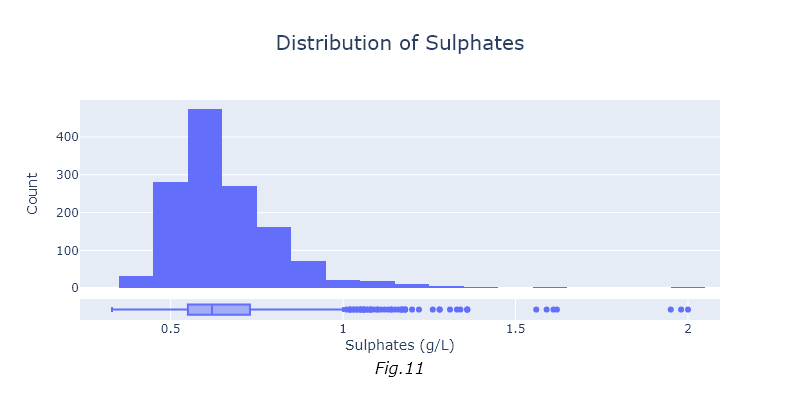


            count   mean    std   min   25%   50%   75%  max
sulphates  1359.0  0.659  0.171  0.33  0.55  0.62  0.73  2.0



In [39]:
hist_box_eda(df, "sulphates", "Sulphates (g/L)", "Fig.11", render_mode)

The `sulphates` variable has a mean of 0.659 g/L and a standard deviation of 0.171 g/L. The minimum value recorded is 0.33 g/L, while the maximum value reaches 2.0 g/L, indicating a wide range of values. The interquartile range (IQR) spans from 0.55 g/L (25th percentile) to 0.73 g/L (75th percentile), with a median of 0.62 g/L. The distribution (*Fig.11*) appears slightly positively skewed, with the presence of higher values at the upper end, suggesting a concentration of lower sulphate levels among the majority of samples while also highlighting the existence of some outliers.

In [40]:
any_outliers_iqr(df, "sulphates").head()

There are 54 top outliers in 'sulphates' above 1.0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
135,9.2,0.52,1.00,3.4,0.610,32.0,69.0,0.9996,2.74,2.00,9.4,4
85,8.6,0.49,0.29,2.0,0.110,19.0,133.0,0.9972,2.93,1.98,9.8,5
80,8.6,0.49,0.28,1.9,0.110,20.0,136.0,0.9972,2.93,1.95,9.9,6
626,7.1,0.31,0.30,2.2,0.053,36.0,127.0,0.9965,2.94,1.62,9.5,5
202,8.9,0.59,0.50,2.0,0.337,27.0,81.0,0.9964,3.04,1.61,9.5,6


In `sulphates`, there are 54 statistical outliers that exceed the upper boundary of 1.0 g/L, which is calculated as 1.5 times the interquartile range (IQR). This threshold is already above the acceptable upper limit for `sulphates` in the winemaking industry, where appropriate levels typically should not exceed 0.7 g/L for quality wines. The presence of these outliers raises concerns regarding their impact on the overall wine quality and safety. As previously noted, a comprehensive decision regarding the treatment of these outliers will be addressed in *Chapter 3.13*, ensuring that all factors are considered before concluding on their implications.

In [41]:
corr_bar(corr_matrix, "sulphates")

<style type="text/css">
#T_78843 th {
  white-space: normal;
  width: 50px;
}
#T_78843 td {
  width: 50px;
}
#T_78843_row0_col0 {
  background-color: #b40426;
  color: #f1f1f1;
}
#T_78843_row0_col1 {
  background-color: #c83836;
  color: #f1f1f1;
}
#T_78843_row0_col2 {
  background-color: #f29072;
  color: #f1f1f1;
}
#T_78843_row0_col3 {
  background-color: #f39778;
  color: #000000;
}
#T_78843_row0_col4 {
  background-color: #f7b194;
  color: #000000;
}
#T_78843_row0_col5 {
  background-color: #e1dad6;
  color: #000000;
}
#T_78843_row0_col6 {
  background-color: #dedcdb;
  color: #000000;
}
#T_78843_row0_col7 {
  background-color: #dddcdc;
  color: #000000;
}
#T_78843_row0_col8 {
  background-color: #cedaeb;
  color: #000000;
}
#T_78843_row0_col9 {
  background-color: #a5c3fe;
  color: #000000;
}
#T_78843_row0_col10 {
  background-color: #3b4cc0;
  color: #f1f1f1;
}
</style>
<table id="T_78843" style="width: 55%;">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_78843_level0_col0" class="col_heading level0 col0" >quality</th>
      <th id="T_78843_level0_col1" class="col_heading level0 col1" >citric acid</th>
      <th id="T_78843_level0_col2" class="col_heading level0 col2" >fixed acidity</th>
      <th id="T_78843_level0_col3" class="col_heading level0 col3" >alcohol</th>
      <th id="T_78843_level0_col4" class="col_heading level0 col4" >density</th>
      <th id="T_78843_level0_col5" class="col_heading level0 col5" >free sulfur dioxide</th>
      <th id="T_78843_level0_col6" class="col_heading level0 col6" >chlorides</th>
      <th id="T_78843_level0_col7" class="col_heading level0 col7" >residual sugar</th>
      <th id="T_78843_level0_col8" class="col_heading level0 col8" >total sulfur dioxide</th>
      <th id="T_78843_level0_col9" class="col_heading level0 col9" >pH</th>
      <th id="T_78843_level0_col10" class="col_heading level0 col10" >volatile acidity</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th id="T_78843_level0_row0" class="row_heading level0 row0" >sulphates</th>
      <td id="T_78843_row0_col0" class="data row0 col0" >0.381</td>
      <td id="T_78843_row0_col1" class="data row0 col1" >0.342</td>
      <td id="T_78843_row0_col2" class="data row0 col2" >0.221</td>
      <td id="T_78843_row0_col3" class="data row0 col3" >0.208</td>
      <td id="T_78843_row0_col4" class="data row0 col4" >0.158</td>
      <td id="T_78843_row0_col5" class="data row0 col5" >0.041</td>
      <td id="T_78843_row0_col6" class="data row0 col6" >0.034</td>
      <td id="T_78843_row0_col7" class="data row0 col7" >0.030</td>
      <td id="T_78843_row0_col8" class="data row0 col8" >-0.008</td>
      <td id="T_78843_row0_col9" class="data row0 col9" >-0.100</td>
      <td id="T_78843_row0_col10" class="data row0 col10" >-0.324</td>
    </tr>
  </tbody>
</table>


`Sulphates` exhibit moderate positive correlations with `quality` and `citric acid`, along with weak positive correlations with `volatile acidity`.

### 3.12 Alcohol
`Alcohol` content, expressed as a percentage by volume (% v/v), adds body, warmth, and intensity to the wine’s flavor. Red wines generally range from 12% to 15% alcohol, but *Vinho Verde* tinto typically falls between 9% and 11%. This lower `alcohol` level aligns with the wine’s light, refreshing profile, making it ideal for warm climates and casual drinking occasions. *Vinho Verde’s* lower `alcohol` keeps it accessible and easy-drinking, with a crisp finish and bright acidity that enhances its fresh, zesty character without the heaviness that higher `alcohol` wines may carry.

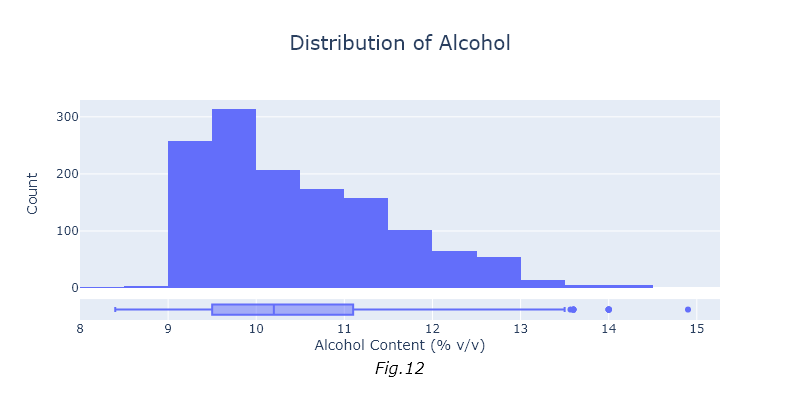


          count    mean    std  min  25%   50%   75%   max
alcohol  1359.0  10.432  1.082  8.4  9.5  10.2  11.1  14.9



In [42]:
hist_box_eda(df, "alcohol", "Alcohol Content (% v/v)", "Fig.12", render_mode)

The `alcohol` variable has a mean `alcohol` content of 10.432% and a standard deviation of 1.082%. The minimum recorded `alcohol level` is 8.4%, while the maximum reaches 14.9%, indicating a broad range of alcohol content among the samples. The interquartile range (IQR) spans from 9.5% (25th percentile) to 11.1% (75th percentile), with a median of 10.2%. The distribution appears slightly skewed (*Fig.12*), with most values clustering around the mean, reflecting typical alcohol levels for red wines, particularly within the Vinho Verde variety, which generally has lower alcohol content compared to other wine types. Tho box plot reveals presence of few outliers.

In [43]:
any_outliers_iqr(df, "alcohol").head()

There are 12 top outliers in 'alcohol' above 13.5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
565,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5
127,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
408,8.8,0.46,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.0,6
510,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
710,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7


There are 12 outliers in the higher end of `alcohol` variable above the 13.5 1.5*IQR limit. It is noteworthy, that typical *Vinho Verde* wine falls between 9% and 11% according to the domain knowledge. These outliers will also be accounted for in *Chapter 3.13*.

In [44]:
corr_bar(corr_matrix, "alcohol")

<style type="text/css">
#T_c0bb7 th {
  white-space: normal;
  width: 50px;
}
#T_c0bb7 td {
  width: 50px;
}
#T_c0bb7_row0_col0 {
  background-color: #b40426;
  color: #f1f1f1;
}
#T_c0bb7_row0_col1 {
  background-color: #f7a98b;
  color: #000000;
}
#T_c0bb7_row0_col2 {
  background-color: #f7b396;
  color: #000000;
}
#T_c0bb7_row0_col3 {
  background-color: #f2c9b4;
  color: #000000;
}
#T_c0bb7_row0_col4 {
  background-color: #efcebd;
  color: #000000;
}
#T_c0bb7_row0_col5 {
  background-color: #c7d7f0;
  color: #000000;
}
#T_c0bb7_row0_col6 {
  background-color: #bcd2f7;
  color: #000000;
}
#T_c0bb7_row0_col7 {
  background-color: #8fb1fe;
  color: #000000;
}
#T_c0bb7_row0_col8 {
  background-color: #7da0f9;
  color: #f1f1f1;
}
#T_c0bb7_row0_col9 {
  background-color: #7396f5;
  color: #f1f1f1;
}
#T_c0bb7_row0_col10 {
  background-color: #3b4cc0;
  color: #f1f1f1;
}
</style>
<table id="T_c0bb7" style="width: 55%;">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_c0bb7_level0_col0" class="col_heading level0 col0" >quality</th>
      <th id="T_c0bb7_level0_col1" class="col_heading level0 col1" >sulphates</th>
      <th id="T_c0bb7_level0_col2" class="col_heading level0 col2" >pH</th>
      <th id="T_c0bb7_level0_col3" class="col_heading level0 col3" >residual sugar</th>
      <th id="T_c0bb7_level0_col4" class="col_heading level0 col4" >citric acid</th>
      <th id="T_c0bb7_level0_col5" class="col_heading level0 col5" >fixed acidity</th>
      <th id="T_c0bb7_level0_col6" class="col_heading level0 col6" >free sulfur dioxide</th>
      <th id="T_c0bb7_level0_col7" class="col_heading level0 col7" >volatile acidity</th>
      <th id="T_c0bb7_level0_col8" class="col_heading level0 col8" >total sulfur dioxide</th>
      <th id="T_c0bb7_level0_col9" class="col_heading level0 col9" >chlorides</th>
      <th id="T_c0bb7_level0_col10" class="col_heading level0 col10" >density</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th id="T_c0bb7_level0_row0" class="row_heading level0 row0" >alcohol</th>
      <td id="T_c0bb7_row0_col0" class="data row0 col0" >0.488</td>
      <td id="T_c0bb7_row0_col1" class="data row0 col1" >0.208</td>
      <td id="T_c0bb7_row0_col2" class="data row0 col2" >0.183</td>
      <td id="T_c0bb7_row0_col3" class="data row0 col3" >0.112</td>
      <td id="T_c0bb7_row0_col4" class="data row0 col4" >0.091</td>
      <td id="T_c0bb7_row0_col5" class="data row0 col5" >-0.063</td>
      <td id="T_c0bb7_row0_col6" class="data row0 col6" >-0.099</td>
      <td id="T_c0bb7_row0_col7" class="data row0 col7" >-0.226</td>
      <td id="T_c0bb7_row0_col8" class="data row0 col8" >-0.275</td>
      <td id="T_c0bb7_row0_col9" class="data row0 col9" >-0.302</td>
      <td id="T_c0bb7_row0_col10" class="data row0 col10" >-0.470</td>
    </tr>
  </tbody>
</table>


`Alcohol` exhibits strong positive correlations with `quality` ratings (0.488), while also demonstrating strong negative correlations with `density` (-0.470). Moderate negative correlations are present with `volatile acidity`, `total sulfur dioxide`, and `chlorides`, with weak or negligible correlations observed with the remaining features.

### 3.13 Summary of EDA
The Exploratory Data Analysis (EDA) is complete. Overview of the features, their correlations and multicollinearity, as well as overview of outliers in the dataset and corresponding decisions will be discussed in this chapter.

#### 3.13.1 Features and Correlations

The Exploratory Data Analysis (EDA) reveals that `quality`, the **ordinal target variable** derived from sensory data, represents subjective assessments, while the **independent variables** are objective, physicochemical measurements. Analysis, supported by domain knowledge, indicates that these variables—including `acidity`, `pH`, `sulfur dioxide` levels, and `alcohol` content—all have direct or indirect impacts on sensory perception, suggesting the feasibility of constructing a predictive model based on these features. Notably, `alcohol` generally correlates with perceived body and sweetness, while `acidity` and `sulfur dioxide` levels influence freshness and stability, essential for overall wine quality.

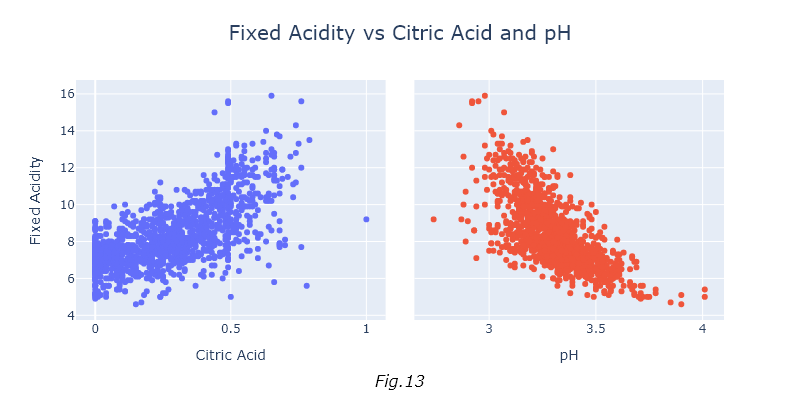

In [45]:
fig13 = make_subplots(
    rows=1,
    cols=2,
    shared_yaxes=True,
)

fig13.add_trace(
    go.Scatter(
        x=df["citric acid"],
        y=df["fixed acidity"],
        mode="markers",
    ),
    row=1,
    col=1,
)

fig13.add_trace(
    go.Scatter(
        x=df["pH"],
        y=df["fixed acidity"],
        mode="markers",
    ),
    row=1,
    col=2,
)

fig13.update_layout(
    title_text="Fixed Acidity vs Citric Acid and pH",
    title_font_size=20,
    title_x=0.5,
    showlegend=False,
    annotations=[
        dict(
            text="<i>Fig.13</i>",
            xref="paper",
            yref="paper",
            x=0.5,
            y=-0.3,
            showarrow=False,
            font=dict(size=16, color="black"),
        )
    ],
    autosize=False,
    width=800,
    height=400,
    margin=dict(l=40, r=40, t=80, b=80),
    xaxis_title="Citric Acid",
    yaxis_title="Fixed Acidity",
    xaxis2_title="pH",
)


fig13.update_layout(xaxis=dict(domain=[0.05, 0.48]), xaxis2=dict(domain=[0.52, 0.95]))

fig_px_render(fig13, render_mode, "Fig13")

The correlation analysis highlights several noteworthy relationships among the physicochemical variables and the `quality` rating. As illustrated in *Fig.13*, `fixed acidity` exhibits a strong positive correlation with `citric acid` (0.657) and a negative correlation with `pH` (-0.709), indicating that wines with higher acidity levels tend to have lower pH values, which is consistent with wine quality expectations. Additionally, `alcohol` shows a moderate positive correlation with `quality` (0.488), suggesting that higher alcohol content may enhance perceived quality.

Conversely, `volatile acidity` has a notable negative correlation with `quality` (-0.387), implying that wines with higher `volatile acidity` levels are often perceived as lower in `quality`. Furthermore, a strong positive correlation exists between `free sulfur dioxide` and `total sulfur dioxide` (0.790), indicating potential **multicollinearity**. These two variables may overlap significantly in their contributions to the model. This **multicollinearity** suggests caution when interpreting the individual effects of these variables, as they may not provide unique information regarding their influence on wine `quality`. **Multicollinearity** of these two (`free sulfur dioxide` and `total sulfur dioxide`) variables is easy to spot not only because of their statistical relationship, but also because according to the domain knowledge `free sulfur dioxide` is part of `total sulfur dioxide`.

To ensure a comprehensive assessment of **multicollinearity** across all **independent variables** and to support robust decision-making, the *Variance Inflation Factor (VIF)* will be calculated prior to the model construction phase.

#### 3.13.2 Features and Outliers

In [46]:
overall_outliers = pd.DataFrame()

independent_vars = df.drop(columns=["quality"])

for col_name in independent_vars.columns:
    col_outliers = any_outliers_iqr(independent_vars, col_name, False)
    col_outliers = col_outliers[[col_name]]

    if overall_outliers.empty:
        overall_outliers = col_outliers
    else:
        overall_outliers = overall_outliers.join(col_outliers, how="outer")

overall_outliers["outlier count"] = overall_outliers.notna().sum(axis=1)
overall_outliers = overall_outliers.join(df["quality"])

overall_outliers.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,outlier count,quality
8,NaN,NaN,NaN,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,5
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.56,NaN,1,5
12,NaN,NaN,NaN,3.8,0.176,52.0,145.0,NaN,NaN,NaN,NaN,4,5
13,NaN,NaN,NaN,3.9,0.170,51.0,148.0,NaN,NaN,NaN,NaN,4,5
15,NaN,NaN,NaN,NaN,0.368,NaN,NaN,NaN,NaN,1.28,NaN,2,5


Throughout the analysis, numerous outliers (a total of 474) were identified across various features based on statistical evaluations. Some of these outliers overlap within the same rows, creating instances where multiple outliers exist in a single row, as shown in *Fig. 13*. However, as previously discussed in the EDA, some statistical outliers fall within acceptable ranges for the winemaking industry according to domain knowledge.

The primary objective of this outlier analysis was to uncover potential systematic discrepancies in physicochemical measurements—specifically, rows where more than half the values are flagged as outliers, if any exist. Results show that the highest number of outliers in a single row is four, occurring in eight out of the 1,359 rows in the dataset. Additionally, 18 rows contain three outliers each. This is relatively low prevalence of the outliers per data row - too low to serve as evidence for systematic measurement discrepancies.

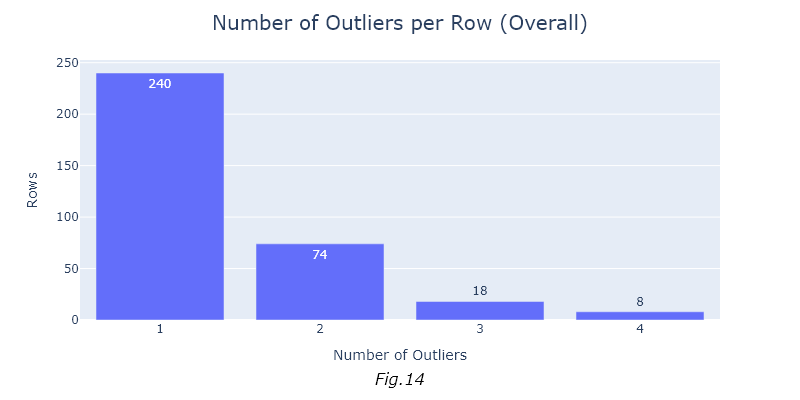


Total outliers in the dataset:  474
Total rows with outliers in the dataset:  340 



In [47]:
outlier_counts = overall_outliers["outlier count"].value_counts().reset_index()
outlier_counts.columns = ["outliers row", "count"]
outlier_counts["outliers row"] = outlier_counts["outliers row"].astype(str)

fig14 = px.bar(outlier_counts, x="outliers row", y="count", text="count")

fig_update(
    fig14,
    "Number of Outliers per Row (Overall)",
    "<i>Fig.14</i>",
    "Number of Outliers",
    "Rows",
    "",
    800,
    400,
)

fig_px_render(fig14, render_mode, "Fig14")

print("\nTotal outliers in the dataset: ", overall_outliers["outlier count"].sum())
print("Total rows with outliers in the dataset: ", overall_outliers.shape[0], "\n")

#### 3.13.3 Outliers and Quality

In [48]:
outliers_per_quality = overall_outliers["quality"].value_counts().sort_index()

total_counts_per_quality = df["quality"].value_counts().sort_index()

outlier_summary = pd.DataFrame(
    {
        "outlier row count": outliers_per_quality,
        "total row count": total_counts_per_quality,
    }
)

outlier_summary["outlier %"] = (
    outlier_summary["outlier row count"] / outlier_summary["total row count"] * 100
).round(2)

outlier_summary.reset_index().rename(columns={"index": "quality"})

,quality,outlier row count,total row count,outlier %
0,3,7,10,70.00
1,4,20,53,37.74
2,5,143,577,24.78
3,6,112,535,20.93
4,7,52,167,31.14
5,8,6,17,35.29


As illustrated in the table above, the prevalence of outliers in medium `quality` wines (levels 5 and 6) is relatively moderate. It is important to note that not all statistical outliers exceed industry accepted levels. However, the ratio of wines exhibiting outlier characteristics tends to increase with both lower and higher `quality` levels. The distribution of `quality` classes is unbalanced, which complicates the analysis of whether `quality` is influenced by the prevalence of outliers. While this relationship may indeed be a contributing factor worth exploring further, such an investigation lies outside the scope of this project.

#### 3.13.4 Extreme Outliers

In [49]:
any_outliers_iqr(df, "total sulfur dioxide", False).head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
920,7.9,0.3,0.68,8.3,0.05,37.5,289.0,0.99316,3.01,0.51,12.3,7
918,7.9,0.3,0.68,8.3,0.05,37.5,278.0,0.99316,3.01,0.51,12.3,7


Analysis in *Chapter 3.8* identified two extreme values for `total sulfur dioxide` (278.0 mg/L and 289.0 mg/L, as shown in the table above), which significantly exceed even industry standards (with a typical upper limit of 150 mg/L). Nonetheless, further research in publicly available sources revealed that, although some countries enforce legal limits on `total sulfur dioxide` (e.g., [the UK’s Food Standards Agency](https://www.food.gov.uk/business-guidance/wine-production)), there are cases where governing bodies permit deviations due to winemaking complexities, as specified in [Commission Implementing Regulation (EU) No 347/2014](https://eur-lex.europa.eu/legal-content/EN/TXT/HTML/?uri=CELEX:32014R0347)).

Given these nuances in the winemaking industry and the fact that some statistical outliers may still fall within acceptable levels, outliers in this dataset will not be adjusted or removed and will remain in their original state for the construction of the explanatory model.

In [50]:
df_post_eda = df.copy()

## 4. Construction of Explanatory Model

Log Transform and Scaling
VIF
Train-Test Split
Fit Logistic Regression
Test the model on the test set.
Confusion matrix.
Plot ???
Residual Analysis
Back-Scale Coefficients
Inverse Log Transformation
Additional Visualizations???

### 4.1 Splitting the Dataset
In order to avoid *data leakage* the dataset will be split to *train* and *test* subsets at a 80/20 ratio. The split will be stratified per classes in the **target variable** - `quality`.

In [51]:
X = independent_vars
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2024, stratify=y
)

print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (1087, 11), Test set shape: (272, 11)


In [52]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
833,8.4,0.590,0.29,2.6,0.109,31.0,119.0,0.99801,3.15,0.50,9.1
1039,10.9,0.320,0.52,1.8,0.132,17.0,44.0,0.99734,3.28,0.77,11.5
321,10.4,0.575,0.61,2.6,0.076,11.0,24.0,1.00000,3.16,0.69,9.0
696,8.2,0.280,0.40,2.4,0.052,4.0,10.0,0.99356,3.33,0.70,12.8
1134,7.2,0.835,0.00,2.0,0.166,4.0,11.0,0.99608,3.39,0.52,10.0


In [53]:
y_train.head()

833     5
1039    6
321     5
696     7
1134    5
Name: quality, dtype: int64

### 4.2 Data Transformation and Standard Scaling
As seen from EDA throughout *Chapter 3*, **independent variables** exhibit different distributions and are on various different scales. To deal with that, first a *log transformation* will be applied to the data, and then the *log transformed* data will be standardized by applying *standard scaling*. Same methods will be applied to both *train* and *test* sets.

In [54]:
def log_n_scale(data1, data2, cols):
    data1_log = np.log1p(data1)
    data2_log = np.log1p(data2)

    scaler = StandardScaler()

    data1_scaled = scaler.fit_transform(data1_log)
    data1_scaled = pd.DataFrame(
        data1_scaled, index=data1_log.index, columns=data1.columns[:cols]
    )

    data2_scaled = scaler.transform(data2_log)
    data2_scaled = pd.DataFrame(
        data2_scaled, index=data2_log.index, columns=data2.columns[:cols]
    )

    return data1_log, data2_log, data1_scaled, data2_scaled

In [55]:
X_train_log, X_test_log, X_train_scaled, X_test_scaled = log_n_scale(
    X_train, X_test, 11
)

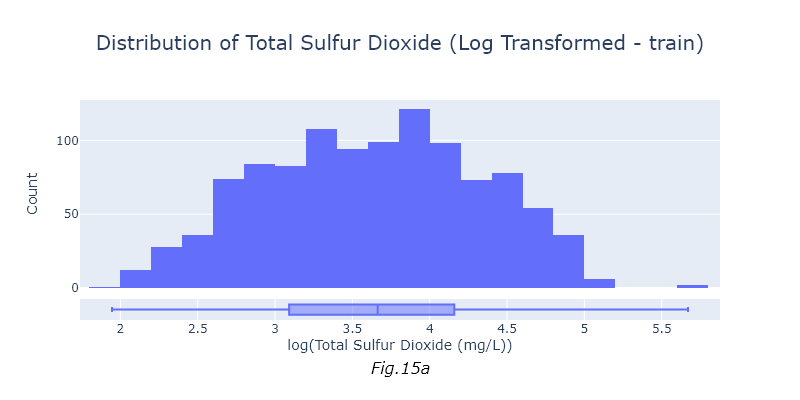

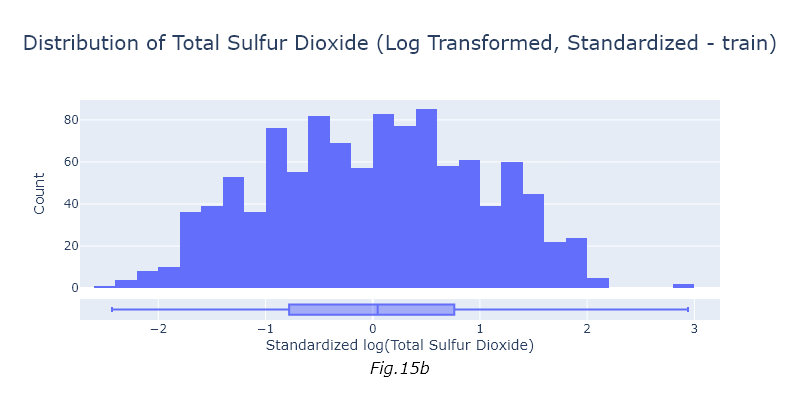

In [56]:
hist_box_eda(
    X_train_log,
    "total sulfur dioxide",
    "log(Total Sulfur Dioxide (mg/L))",
    "Fig.15a",
    render_mode,
    "(Log Transformed - train)",
    False,
)

hist_box_eda(
    X_train_scaled,
    "total sulfur dioxide",
    "Standardized log(Total Sulfur Dioxide)",
    "Fig.15b",
    render_mode,
    "(Log Transformed, Standardized - train)",
    False,
)

As an example of *log transformation* and *standard scaling* of the data, distribution of *log transformed* `total sulfur dioxide` is presented in *Fig.15a*, and subsequently *standard scaled* - in *Fig.15b*.

### 4.3 Dealing with Multicollinearity (VIF)
In this step, the goal is to assess **multicollinearity** among the **independent variables** using the *Variance Inflation Factor (VIF)*. High VIF values indicate that a feature is highly correlated with other features, which can affect the stability and interpretability of the logistic regression model. A common threshold for considering a feature problematic is a VIF above 5.

In [57]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_scaled.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_train_scaled.values, i)
    for i in range(X_train_scaled.shape[1])
]

print(vif_data)

                 Feature       VIF
0          fixed acidity  8.429246
1       volatile acidity  1.842931
2            citric acid  3.022575
3         residual sugar  1.768641
4              chlorides  1.451303
5    free sulfur dioxide  2.964283
6   total sulfur dioxide  3.351305
7                density  6.918042
8                     pH  3.657062
9              sulphates  1.486890
10               alcohol  3.274270


**Independent variables** `fixed acidity` and `density` exhibit *VIF* values above 5. The one with the highest *VIF* will be removed from both *train* and *test* sets. This will bring *VIF* of `density` below 5 as well.

In [58]:
def train_test_cols_drop(df_train, df_test, col):
    return df_train.drop(columns=col), df_test.drop(columns=col)

In [59]:
X_train_scaled, X_test_scaled = train_test_cols_drop(
    X_train_scaled, X_test_scaled, "fixed acidity"
)

### 4.4 Training the Model
Considering that **target variable** `quality` is ordinal, *OrderedModel* from *statsmodels* will be used.

#### 4.4.1 Initial Model

In [60]:
model = OrderedModel(y_train, X_train_scaled, distr="logit")

result = model.fit(method="bfgs")

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.982087
         Iterations: 43
         Function evaluations: 44
         Gradient evaluations: 44
                             OrderedModel Results                             
Dep. Variable:                quality   Log-Likelihood:                -1067.5
Model:                   OrderedModel   AIC:                             2165.
Method:            Maximum Likelihood   BIC:                             2240.
Date:                Sun, 03 Nov 2024                                         
Time:                        08:45:40                                         
No. Observations:                1087                                         
Df Residuals:                    1072                                         
Df Model:                          10                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------

#### 4.4.2 Iterative Removal of Predictors
Based on the above summary of the *Initial Model*, **independent variables**, which are not statistically significant for the model are iteratively removed. On each iteration a **predictor** with the highest p-value is removed until all the remaining **predictors** exhibit p-value lower, than the *significance level* (0.05).

In [61]:
X_train_scaled, X_test_scaled = train_test_cols_drop(
    X_train_scaled, X_test_scaled, "density"
)

In [62]:
X_train_scaled, X_test_scaled = train_test_cols_drop(
    X_train_scaled, X_test_scaled, "residual sugar"
)

In [63]:
X_train_scaled, X_test_scaled = train_test_cols_drop(
    X_train_scaled, X_test_scaled, "citric acid"
)

In [64]:
X_train_scaled, X_test_scaled = train_test_cols_drop(
    X_train_scaled, X_test_scaled, "free sulfur dioxide"
)

#### 4.4.3 Final Model

In [65]:
model = OrderedModel(y_train, X_train_scaled, distr="logit")

result = model.fit(method="bfgs")

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.984244
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
                             OrderedModel Results                             
Dep. Variable:                quality   Log-Likelihood:                -1069.9
Model:                   OrderedModel   AIC:                             2162.
Method:            Maximum Likelihood   BIC:                             2217.
Date:                Sun, 03 Nov 2024                                         
Time:                        08:45:40                                         
No. Observations:                1087                                         
Df Residuals:                    1076                                         
Df Model:                           6                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------

### 4.5 Status of the Main Hypothesis
In *Chapter 2* of this notebook a null hypothesis was formulated, stating that *residual sugar does not have impact on the quality of wine. In the course of construction of the model, the **predictor** `residual sugar` acquired the p-value of 0.395, which indicates, that statistically, with 95% confidence, this **predictor** has no significance towards the **target variable**. Therefore the null hypothesis stands ($H_0$ is failed to be rejected).

### 4.6 Interpretation of Model Parameters

#### 4.6.1 Pseudo R²
For logistic regression models R² is not being calculated directly like in Ordinary Least Squares (OLS) regression.  In OLS, R² represents the proportion of variance explained by the model. However, in the context of ordinal models, the interpretation and computation differ because the dependent variable is categorical rather than continuous.

For this model McFadden's R² is calculated. This is one of the most commonly used Pseudo R² values for logistic regression. It is calculated as:

$
R^2_{\text{McFadden}} = 1 - \frac{\text{Log-Likelihood of the fitted model}}{\text{Log-Likelihood of the null model}}
$
 
A higher McFadden's R² (closer to 1) indicates a better model fit.

In [66]:
log_likelihood_model = result.llf
log_likelihood_null = result.llnull

r2_mcfadden = 1 - (log_likelihood_model / log_likelihood_null)

print(f"McFadden's R²: {r2_mcfadden:.06}")

McFadden's R²: 0.184382


The calculated McFadden's R² of 0.184382 means that this *Ordered Model* explains 18.4% of the variance in the **target variable**, relative to a null model (a model with no predictors).

#### 4.6.2 Coefficients
The analysis of the ordered logistic regression model provides insight into the relationship between the quality of Vinho Verde wines and several independent variables. The formula representing this relationship can be expressed:

$
\begin{align*}
\text{Log-Odds}(k) &\quad = \text{intercept}(k) \\
&\quad + (-0.5604) \cdot \text{volatile acidity} \\
&\quad + (-0.2621) \cdot \text{chlorides} \\
&\quad + (-0.1631) \cdot \text{total sulfur dioxide} \\
&\quad + (-0.1406) \cdot \text{pH} \\
&\quad + (0.5307) \cdot \text{sulphates} \\
&\quad + (0.9333) \cdot \text{alcohol}
\end{align*}
$
<br>
<br>
Here, $k$ refers to the specific threshold log-odds are calculated for.

The coefficients themselves, represent change in *log-odds* given particular **independent variable** changes by 1 unit. In this case, as the data has been standardized, 1 unit is particular **independent variable's** change by 1 standard deviation from the mean of that variable. In other words, if one would take a value from an observation for a **predictor**, a distance in standard deviations from that **predictor's** mean should be calculated and filled into the formula.

As indicated by the formula, an increase in `volatile acidity`, `chlorides`, and `total sulfur dioxide` results in a decrease in the *log-odds* of a wine being classified into a higher `quality` category. This negative relationship suggests that higher levels of these variables are associated with lower perceived `quality`. Conversely, an increase in `pH` and `alcohol` levels positively influences the *log-odds*, indicating that wines with higher values of these attributes are more likely to be classified as having better `quality`. Consequently, lower concentrations of volatile acidity, chlorides, and total sulfur dioxide, combined with higher levels of pH and alcohol, contribute to an overall improvement in wine quality.

#### 4.6.3 Coefficient Attributes
As the calculation of coefficients and optimization of the model is iterative process, the following statistical attributes for each coefficient are presented in the model summary:<br>
<br>
**std err:** This column shows standard error of the coefficient estimates. It measures coefficient variability across different samples.<br>
**z:** This column is calculated by dividing the coefficient by it's standard error and shows how many standard deviations the coefficient is away from zero.<br>
**P>|z|:** This column provides the p-value for the z-test associated with each coefficient. It indicates the probability of observing a z-value as extreme as the one calculated if the hypothesis, that the coefficient is zero, is true.<br>
**\[0.025, 0.975\]** These columns show the 95% confidence interval for each coefficient. This interval gives a range of values within which we can be 95% confident that the true coefficient lies.

#### 4.6.4 How Ordered Model Works
For a particular observation the *Ordered Model* would fill in the values of **independent variables** and calculate the *log-odds* for each of the thresholds, filling in the *intercept* for each particular threshold. Then it would assign the observation *probabilities* to be in each class (converted from *Log-Odds*).

For better understanding, total *Log-Odds* can be converted to a *probability* by exponentiating them ($e^\text{Log-Odds}$) and applying formula for calculation from odds to probabilities: $p = \frac{e^{\text{Log-Odds}}}{1 + e^{\text{Log-Odds}}}$

### 4.7 Testing the Model on Test Data
In this chapter, the model will be evaluated using the 20% of the original dataset that was reserved for testing. This step is crucial for assessing the model's predictive performance and its ability to generalize to unseen data. The evaluation will begin with the analysis of the confusion matrix, which provides insights into the true positive, true negative, false positive, and false negative classifications made by the model. This matrix helps in understanding the accuracy and misclassifications of the model's predictions.

Following the confusion matrix analysis, a classification report will be generated, detailing key performance metrics such as precision, recall, and F1-score. These metrics provide a comprehensive overview of the model's performance across different classes and highlight any imbalances in classification. Finally, an examination of the residuals will be conducted to identify patterns or biases in the model's predictions, ensuring a thorough evaluation of its performance. 

In [67]:
class_labels = [3, 4, 5, 6, 7, 8]

y_pred_probs = result.predict(X_test_scaled)
y_pred_probs.columns = class_labels
y_pred = y_pred_probs.idxmax(axis=1)

#### 4.7.1 Confusion Matrix

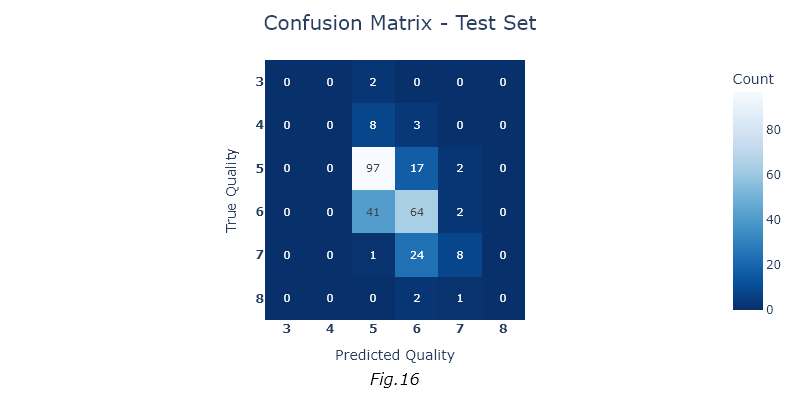

In [68]:
cm = confusion_matrix(y_test, y_pred, labels=class_labels)

cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

fig16 = px.imshow(
    cm_df, text_auto=True, color_continuous_scale="blues_r", labels=dict(color="Count")
)

fig_update(
    fig16,
    "Confusion Matrix - Test Set",
    "<i>Fig.16</i>",
    "Predicted Quality",
    "True Quality",
    "",
    800,
    400,
)

fig16.update_layout(
    xaxis=dict(tickvals=class_labels, tickfont=dict(size=12, weight="bold")),
    yaxis=dict(tickvals=class_labels, tickfont=dict(size=12, weight="bold")),
)

fig16.update_traces(textfont_size=11)

fig_px_render(fig16, render_mode, "Fig16")

Total number of wines in the test set is 272. *Confusion Matrix* in *Fig.16* illustrates how well the constructed *Ordered Model* is abl to predict the wine `quality`.

**True Positive (TP)** is when the prediction matches the true value (diagonal squares in the *Confusion Matrix* from top left to bottom right, i.e. where *True Quality* index matches the one of *Predicted Quality*). The model has predicted correctly 169 wines out of 272.

**False Positive (FP)**, in this case, are the predictions, that are better than the true value (squares above the aforementioned diagonal). The *Confusion Matrix* shows that there are 34 wines with better prediction, than the true `quality` value.

**False Negative (FN)** is quite the opposite - the cases, when prediction is in a lower than true category. In this case there are 69 such wines.

It is worth to note, that the constructed *Ordered Model* tends to predict middle-range classes (especially class 5) more frequently, showing a reluctance to predict the extreme classes (3, 4, and 8). No samples are predicted as class 3, 4 or 8, which suggests that the data is imbalanced and that the model is unable to distinguish these extreme categories effectively. Misclassifications (**FP** and **FN**) generally occur between adjacent classes, which is common in ordinal regression problems and indicates the model somewhat understands the ordinal structure.

#### 4.7.2 Classification Report
The *Classification Report* is another measure for evaluation of the model's efficiency.

In [69]:
class_rept = classification_report(
    y_test, y_pred, target_names=[str(label) for label in class_labels], zero_division=0
)
print(class_rept)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.65      0.84      0.73       116
           6       0.58      0.60      0.59       107
           7       0.62      0.24      0.35        33
           8       0.00      0.00      0.00         3

    accuracy                           0.62       272
   macro avg       0.31      0.28      0.28       272
weighted avg       0.58      0.62      0.59       272



**Precision** is the accuracy of the positive predictions.For classes 3, 4, and 8, the precision is 0.00, indicating that the model did not correctly predict any instances of these classes.

$ \text{precision} = \frac{{\text{True Positives}}}{{\text{True Positives + False Positives}}}$

**Recall** measures the ability of the model to find all the relevant cases (true positives). Again, for classes 3, 4, and 8, the recall is 0.00, meaning that none of the actual instances of these classes were correctly identified by the model.

$ \text{recall} = \frac{{\text{True Positives}}}{{\text{True Positives + False Negatives}}}$

**F1-Score** is the harmonic mean of precision and recall. The F1-score is also 0.00 for classes 3, 4, and 8, reinforcing that there were no correct predictions for these classes.

$ \text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$

**Support** is the number of actual occurrences of the class in the specified dataset. This indicates how many true instances of each class are present in the test set.

In the report, the **overall accuracy** is 0.62, meaning that 62% of all predictions made by the model were correct. The **macro average** is the average of precision, recall, and F1-score across all classes, treating each class equally. In this case, the **macro average** precision is 0.31, recall is 0.28, and F1-score is 0.28, indicating an imbalance across classes, especially given that classes with no predictions significantly reduce these averages. The **weighted average** accounts for the support of each class when calculating the average metrics. In this report, the **weighted average** precision is 0.58, recall is 0.62, and F1-score is 0.59. This suggests that the model performs better on classes with a larger number of samples (like class 5) than on those with fewer samples (like classes 3, 4, and 8).

## 5. Summary
The Exploratory Data Analysis (EDA) showed that variables in the dataset are of different distributions scales. All of the variables showed different numbers of outliers in the data, although insights from the domain knowledge suggested, that part of statistical outliers may be within acceptable boundaries for the winemaking industry.

**Target variable** `quality` was identified as ordinal, therefore *OrderedModel* from *statsmodels* was chosen for construction.

In the course of construction of the model data was log-transformed, standardized and checked for multicollinearity (*Variance Inflation Factor* was calculated). One **independent variable** was eliminated from the final equation because of multicollinearity issues, four **predictors** - due to lack of statistical significance to the model.

Variable `residual sugar`, related to the *Main Hypothesis*, was identified as one of the statistically not significant **predictors**. Null hypothesis stands.

Constructed model was tested on the *Test Set* (20% hold-out set of the original dataset) and accuracy was evaluated. The model shows 62% overall accuracy. It is worth to mention, that the model performed better on medium-ranged classes (5 and 6), than the extreme classes (3, 4 and 8). This is mainly due to class imbalance, which was observed in the course of EDA as well.

## 6. Conclusions
Although the target variable `quality` might seem inherently subjective due to its sensory nature, the model, constructed using independent variables derived from physicochemical measurements, performs relatively well. There is, however, room for improvement in the performance for extreme quality classes, which are underrepresented, leading to dataset imbalance.

Outliers are relatively prevalent, with 340 of 1,359 rows (25%) containing at least one outlier. This prevalence is partially explained by the fact that some outliers fall within industry-acceptable boundaries. 